#### Statistical Foundations of Machine Learning 
INFO-F-422 <br>
2022-2023  
Gian Marco Paldino, Cédric Simar, Gianluca Bontempi<br>
Link to the video: https://universitelibrebruxelles.sharepoint.com/:v:/s/GRP_PROJ-WorkingBees/EcrIhlnmVMtOoOdaAKGjMLsBhg7bEGbldcD-7yd3EmarXQ?e=79UpvA 

# Richter's Predictor: Modeling Earthquake Damage
The aim of this project is to predict the level of damage to buildings that happens in Nepal in 2015. It was caused by the Ghorka earthquake. The predictions are based on aspects building locations and construction. The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal.


This survey represents an extensive collection of data after a disaster, making it one of the largest datasets ever gathered. It contains valuable information regarding the effects of earthquakes, the state of households, and socio-economic-demographic statistics. The dataset contains approximately 260,000 labeled samples and consists of 38 different features.

#### Submitted By 
Hakim Amri - 00 459 153 <br>
Mehdi Jdaoudi - 000 457 507

## Configuration

In [1]:
getwd()
Sys.setenv(LANG = "en")
options(repr.matrix.max.cols = 100)
seed <- 42

[1] "/Users/mjdaoudi/Library/CloudStorage/OneDrive-Universite\314\201LibredeBruxelles/_MS-BDGA.2022-2023/Semester_2/INFO-F422 - Statistical Foundations of Machine Learning/richter-s-predictor-group-32"

In [2]:
install.packages("magrittr")
install.packages("dplyr")
install.packages("treemap")
install.packages("ggplot2")
install.packages("caret")
install.packages("randomForest")
install.packages("glmnet")
install.packages("e1071")
install.packages("RSNNS")


The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages

The downloaded binary packages 

In [3]:
library(magrittr)
library(dplyr)
library(treemap)
library(ggplot2)
library(glue)
library(caret)
library(randomForest)
library(glmnet)
library(e1071)
library(RSNNS)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Loading required package: Matrix

Loaded glmnet 4.1-7

Loading required package: Rcpp


Attaching package: 'RSNNS'


The following objects are masked from 'package:caret':

    confusionMatrix, train




## Introduction

Read the data files

In [4]:
x <- read.csv("data/train_values.csv", stringsAsFactors = TRUE)
y <- read.csv("data/train_labels.csv", stringsAsFactors = TRUE)
train_set <- merge(x, y, by = c("building_id"))
train_set$damage_grade <- as.factor(train_set$damage_grade)

## Data Exploration

The training dataset consist of 260.601 observations with 39 features.

In [5]:
options(repr.matrix.max.cols = 100)
head(train_set)
dim(train_set)

building_id geo_level_1_id geo_level_2_id geo_level_3_id count_floors_pre_eq
1  4          30              266            1224          1                  
2  8          17              409           12182          2                  
3 12          17              716            7056          2                  
4 16           4              651             105          2                  
5 17           3             1387            3909          5                  
6 25          26             1132            6645          2                  
  age area_percentage height_percentage land_surface_condition foundation_type
1 25   5               2                t                      r              
2  0  13               7                t                      r              
3  5  12               6                o                      r              
4 80   5               4                n                      r              
5 40   5              10                t                      r              
6  0   6               6                t                      w              
  roof_type ground_floor_type other_floor_type position plan_configuration
1 n         f                 j                s        d                 
2 n         f                 q                s        d                 
3 q         f                 q                s        d                 
4 n         f                 q                s        d                 
5 n         f                 q                o        d                 
6 n         f                 x                s        d                 
  has_superstructure_adobe_mud has_superstructure_mud_mortar_stone
1 0                            1                                  
2 0                            1                                  
3 0                            1                                  
4 0                            1                                  
5 0                            0                                  
6 0                            0                                  
  has_superstructure_stone_flag has_superstructure_cement_mortar_stone
1 0                             0                                     
2 0                             0                                     
3 0                             0                                     
4 0                             0                                     
5 0                             0                                     
6 0                             0                                     
  has_superstructure_mud_mortar_brick has_superstructure_cement_mortar_brick
1 0                                   0                                     
2 0                                   0                                     
3 0                                   0                                     
4 0                                   0                                     
5 1                                   0                                     
6 0                                   0                                     
  has_superstructure_timber has_superstructure_bamboo
1 0                         0                        
2 0                         0                        
3 0                         0                        
4 0                         0                        
5 0                         0                        
6 1                         0                        
  has_superstructure_rc_non_engineered has_superstructure_rc_engineered
1 0                                    0                               
2 0                                    0                               
3 0                                    0                               
4 0                                    0                               
5 0                                    0                               
6 0                                    0                

[1] 260601     40

In [6]:
categorical_var <- which(sapply(x[1, ], class) == "factor")
numerical_var <- which(sapply(x[1, ], class) == "integer")
noquote(sprintf("There are %s categorical variables", length(categorical_var)))
noquote(sprintf("There are %s numerical variables", length(numerical_var)))

[1] There are 8 categorical variables

[1] There are 31 numerical variables

### Target

The target variable is composed of 3 different values of damages : 1 - low, 2 - medium, 3 - high.

In [7]:
dim(y)
head(y)
summary(y$damage_grade)
unique(y$damage_grade)

[1] 260601      2

building_id damage_grade
1 802906      3           
2  28830      2           
3  94947      3           
4 590882      2           
5 201944      3           
6 333020      2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.238   3.000   3.000 

[1] 3 2 1

The following chart shows the frequency of each label in the dataset. It is worth seeing the differences among the labels distribution. Most buildings in the dataset are showing medium damages(2) while roughly 33% are showing high damages. However, buildings with low damages are not much present in the dataset. Only 10% of the dataset is representing them which might be an issue for models.

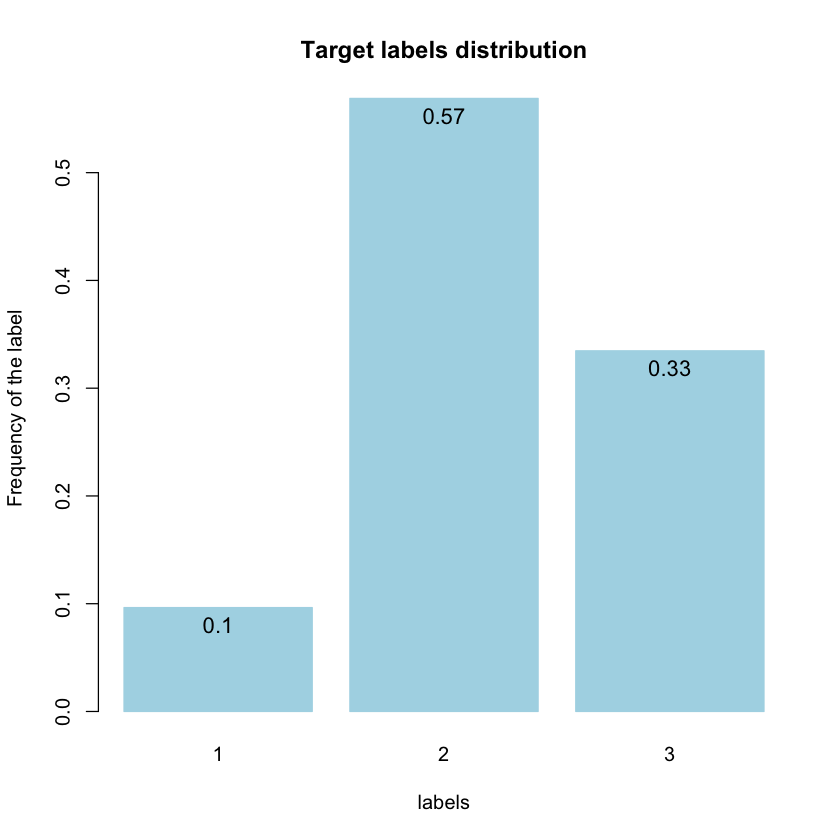

In [8]:
freq_table <- table(y$damage_grade)/sum(table(y$damage_grade))
freq_plot <- barplot(freq_table,
    main = "Target labels distribution",
    xlab = "labels",
    ylab = "Frequency of the label",
    col = "lightblue",
    border = "lightblue" )
text(
    freq_plot, 
    freq_table, 
    round(as.numeric(freq_table), 2), 
    cex = 1.1, 
    pos = 1)

## Data Preprocessing

### Missing values and data exploration

In [9]:
noquote(sprintf("There are %s empty values in the dataset", sum(is.na(x))))

[1] There are 0 empty values in the dataset

##### Categorical Features Study

As we can see here below, it is interesting to know that on top of having no missing values as such, there is no values that can be seen as full, but not having any information (such as 'NA', 'None', or '') which may be not found by the function `is.na(...)`. The individual values of each categorical columns are purely the one described by the authors of the dataset.

In [10]:
for (col in colnames(x[, categorical_var])){
    unique_val <- levels(unique(x[, col]))
    noquote(print(col))
    noquote(print(unique_val))
}


[1] "land_surface_condition"
[1] "n" "o" "t"
[1] "foundation_type"
[1] "h" "i" "r" "u" "w"
[1] "roof_type"
[1] "n" "q" "x"
[1] "ground_floor_type"
[1] "f" "m" "v" "x" "z"
[1] "other_floor_type"
[1] "j" "q" "s" "x"
[1] "position"
[1] "j" "o" "s" "t"
[1] "plan_configuration"
 [1] "a" "c" "d" "f" "m" "n" "o" "q" "s" "u"
[1] "legal_ownership_status"
[1] "a" "r" "v" "w"


##### Numerical variables study

In [11]:
# Make a quick sanity check to see out of boundary
#columns which may be problematic
check_unrealistic_values_int <- function(df, column, lb, hb) {
    #' This function checks for unrealistic values in a specified
    #' column of a data frame. It returns a subset of the column
    #' where the values are either less than the lower bound (lb)
    #' or greater than the higher bound (hb).
    #'
    #' @param df A data frame.
    #' @param column The column name or index in the data frame to check.
    #' @param lb The lower bound value for unrealistic values.
    #' @param hb The higher bound value for unrealistic values.
    #' @return A subset of the specified column containing unrealistic values.
    #' @examples
    t <- df[, column][
        (df[, column] < lb) |
        (df[, column] > hb)
        ]
    return(t)
}

check_unrealistic_values <- function(df, column, b, low) {
    #' This function checks for unrealistic values in a
    #' specified column of a data frame. It returns a subset
    #' of the column where the values are either less than
    #' (if low is TRUE) or greater than
    #' (if low is FALSE) the provided threshold (b).
    #'
    #' @param df A data frame.
    #' @param column The column name or index in the data frame to check.
    #' @param b The threshold value for unrealistic values.
    #' @param low A logical value indicating whether to
    #' check for values less than the threshold (TRUE)
    #' or greater than the threshold (FALSE).
    #' @return A subset of the specified column containing unrealistic values.
    if (low) {
       t <- df[, column][
        (df[, column] < b)]
    } else {
       t <- df[, column][
        (df[, column] > b)]
    }
    return(t)
}

explore_geo_level <- function(df, column, title, x_axis, y_axis) {
    #' This function generates a bar plot and treemap
    #' based on the frequency distribution of
    #' a specified column in a data frame.
    #'
    #' @param df A data frame.
    #' @param column The column name or index in the data frame to explore.
    #' @param title The title of the plot and treemap.
    #' @param x_axis The label for the x-axis.
    #' @param y_axis The label for the y-axis.
    #' @return None (generates a plot and treemap).
    freq <- table(
        df[, column]) / sum(table(df[, column]))

    barplot(freq,
        main = title,
        xlab = x_axis,
        ylab = y_axis,
        col = "lightblue",
        border = "lightblue")

    treemap(
        as.data.frame(freq),
        title = title,
        index = c("Var1"),
        vSize = "Freq",
        palette = "RdYlBu")
}


First lets analyze the `geo_level_x_id` columns, in case the latter may have empty values hidden.

In [12]:
summary(train_set[, "geo_level_1_id"])
print(length(check_unrealistic_values_int(train_set, "geo_level_1_id", 0, 30)))
summary(train_set[, "geo_level_2_id"])
print(length(check_unrealistic_values_int(train_set, "geo_level_2_id", 0, 1427)))
summary(train_set[, "geo_level_3_id"])
print(length(check_unrealistic_values_int(train_set, "geo_level_3_id", 0, 12567)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     7.0    12.0    13.9    21.0    30.0 

[1] 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   350.0   702.0   701.1  1050.0  1427.0 

[1] 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3073    6270    6258    9412   12567 

[1] 0


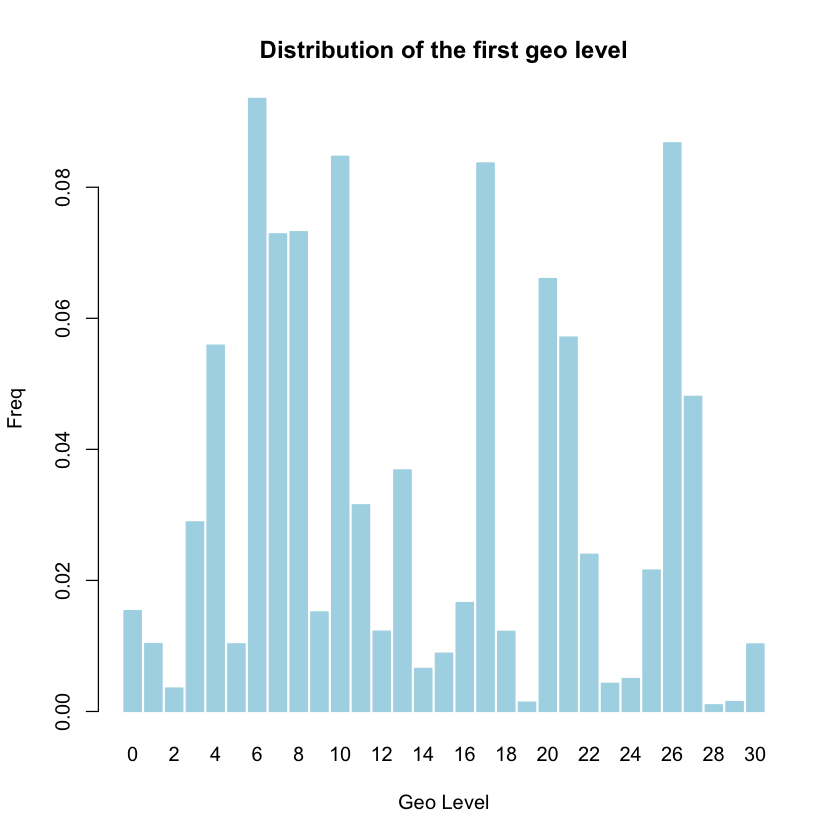

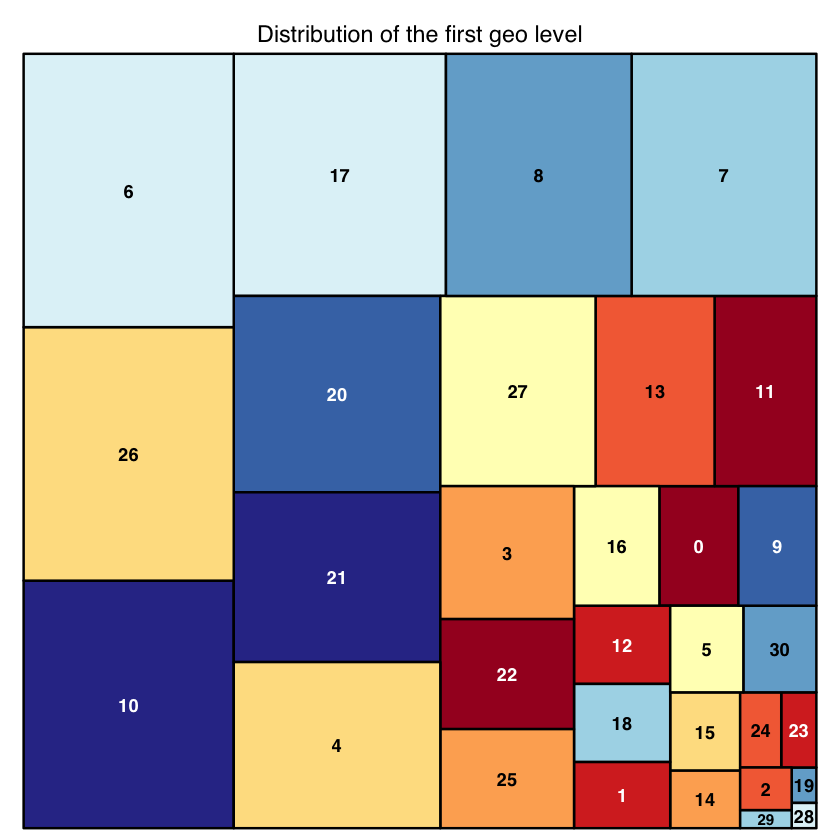

In [13]:
explore_geo_level(
    train_set,
    "geo_level_1_id",
    "Distribution of the first geo level",
    "Geo Level",
    "Freq")

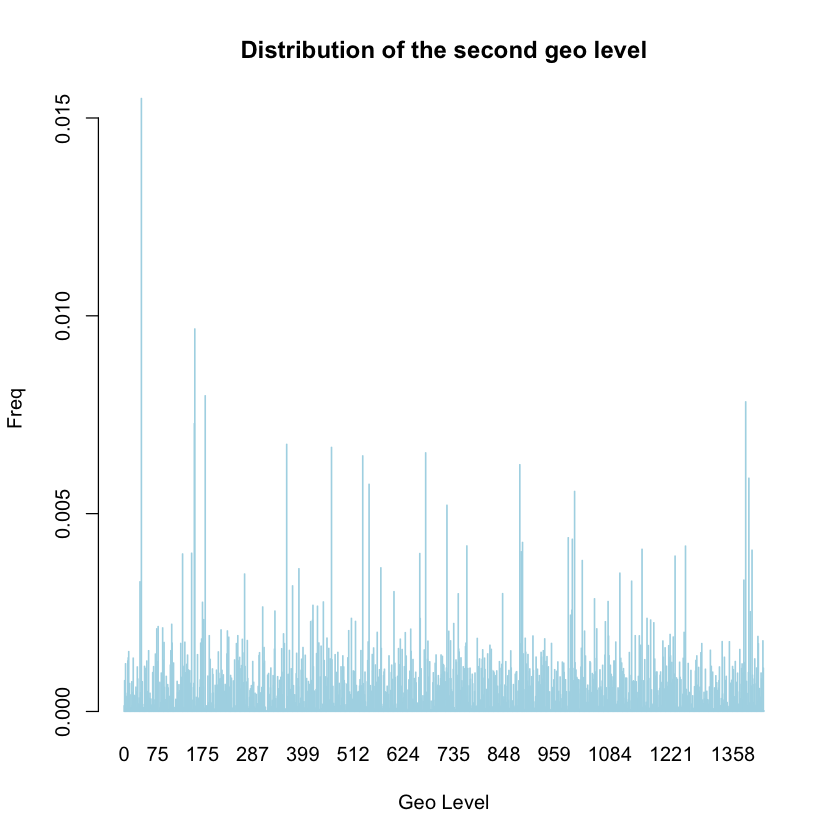

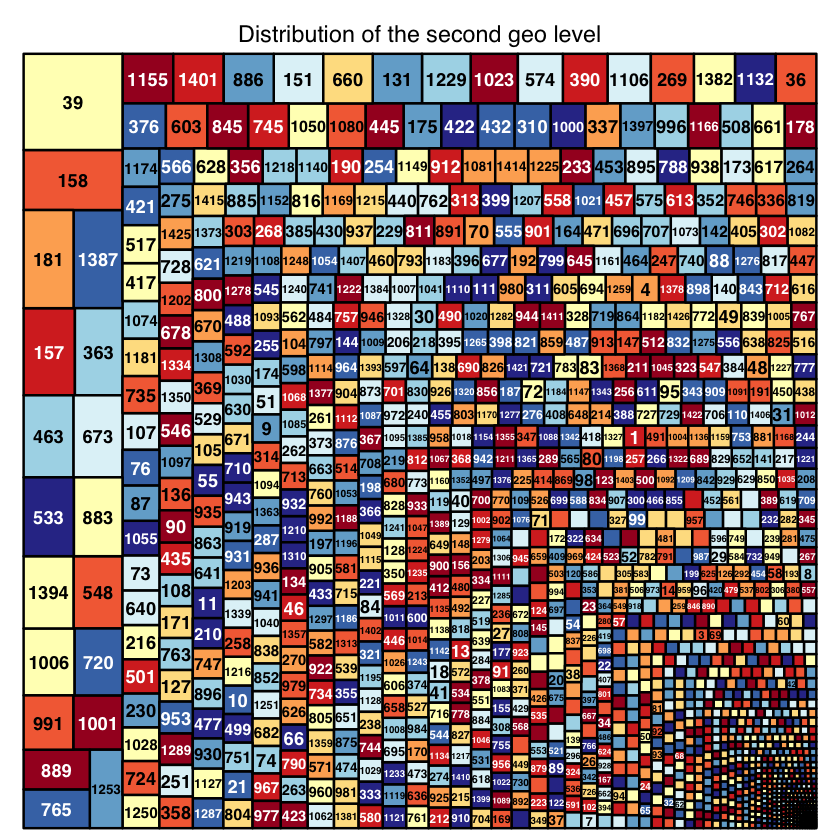

In [14]:
explore_geo_level(
    train_set,
    "geo_level_2_id",
    "Distribution of the second geo level",
    "Geo Level",
    "Freq")

We can see that the third level is very atomic, this feature may not help the model to generalize well and understand underlying patterns in the data.

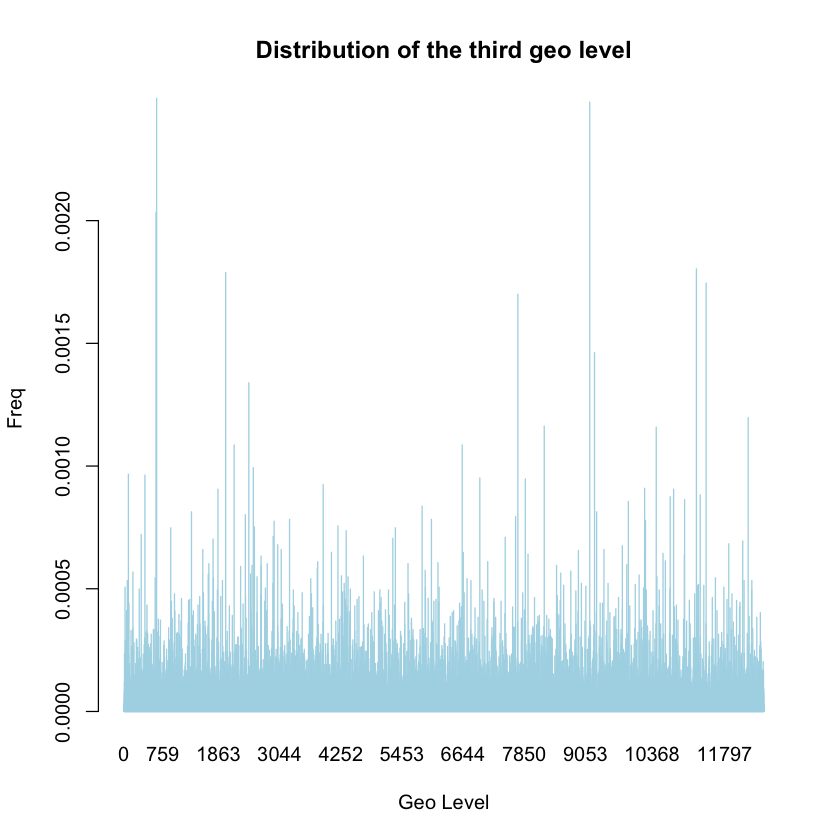

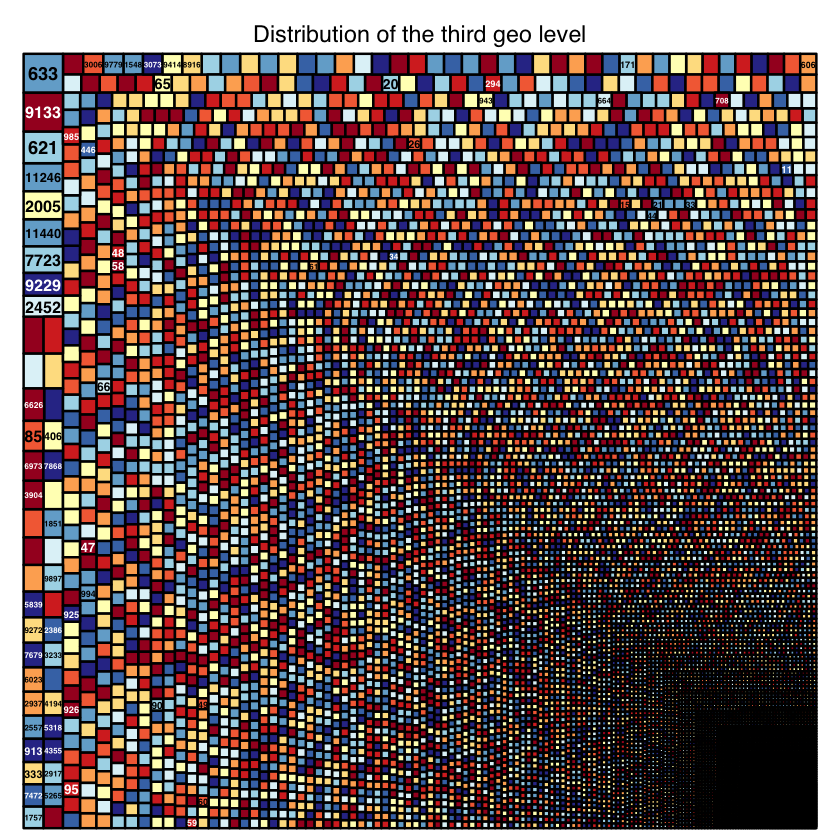

In [15]:
# this cell takes 2 minutes to run
explore_geo_level(
    train_set,
    "geo_level_3_id",
    "Distribution of the third geo level",
    "Geo Level",
    "Freq")

See the whole picture, we can see that it is very atomic as levels get drilled.

`summarise()` has grouped output by 'geo_level_1_id', 'geo_level_2_id'. You can
override using the `.groups` argument.


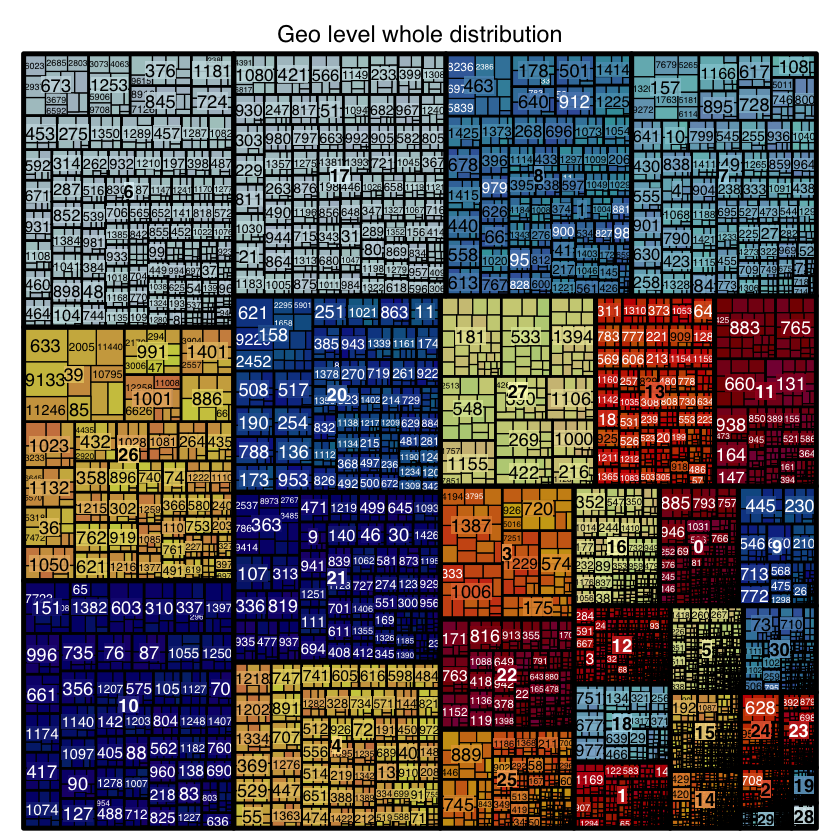

In [16]:
geo_dist <- x %>%
        group_by(geo_level_1_id, geo_level_2_id, geo_level_3_id) %>%
        summarise(freq = n())
treemap(geo_dist,
        index = c("geo_level_1_id","geo_level_2_id", "geo_level_3_id"),
        vSize = "freq",
        type = "index",
        palette = "RdYlBu",
        title = "Geo level whole distribution",
        )

An interesting technique is to link those observations to visually see the shares of target among the geolevels. In this case, we stick to the first level. The end results allows to see the distributions of the target among each group and their size is the volume among the data. This can be a visual intuition on which regions where the most hit by the earthquake. 

In fact, the region 26 can be compared to the region 17, those two have very different profiles, the 17 being hit the most. This is an early sign that shows this feature can be very helpful.

`summarise()` has grouped output by 'geo_level_1_id'. You can override using
the `.groups` argument.


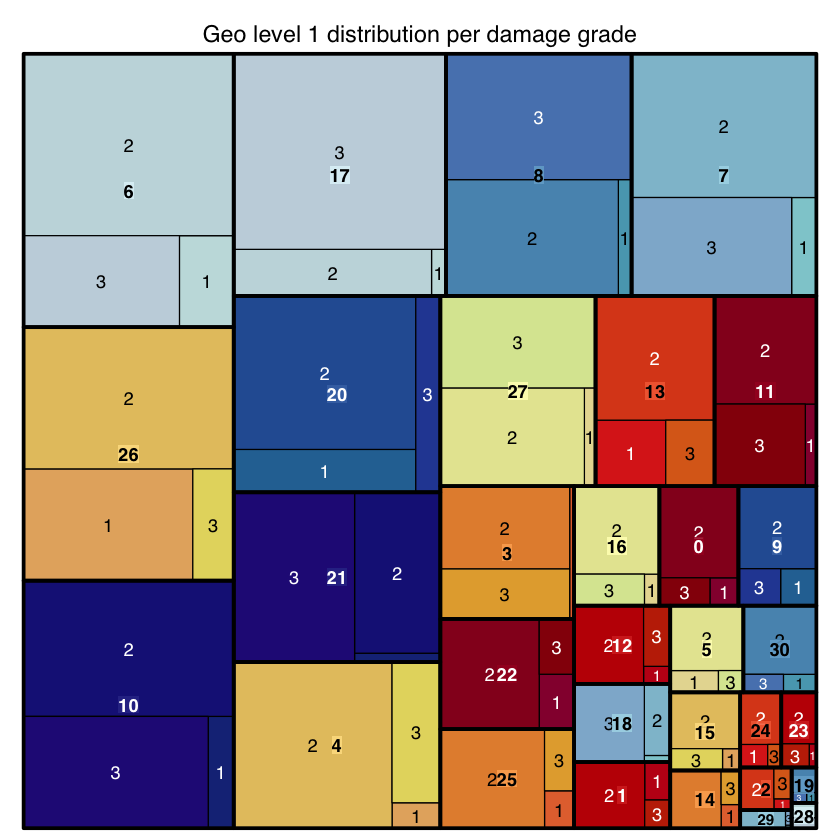

In [17]:
geo_dist_target <- train_set %>%
        group_by(geo_level_1_id, damage_grade) %>%
        summarise(freq = n())

treemap(geo_dist_target,
        index = c("geo_level_1_id", "damage_grade"),
        vSize = "freq",
        type = "index",
        palette = "RdYlBu",
        title = "Geo level 1 distribution per damage grade",
        )

Lets analyse other numerical variables

The number of floors seems to be a normal variable, except from few apparently very large buildings (9 floors). It is also worth noting that it doesn't segregate well the target.

 count_floors_pre_eq
 Min.   :1.00       
 1st Qu.:2.00       
 Median :2.00       
 Mean   :2.13       
 3rd Qu.:2.00       
 Max.   :9.00       

[1] 0

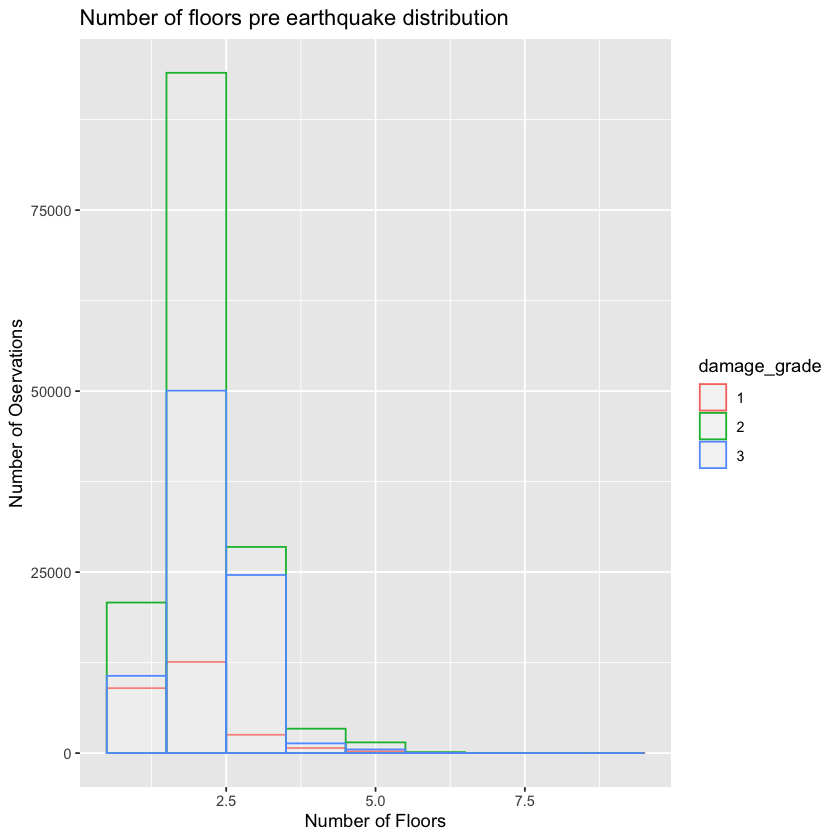

In [18]:
summary(x[c("count_floors_pre_eq")])
length(check_unrealistic_values(x, "count_floors_pre_eq", 0, TRUE))
ggplot(
    train_set[c("count_floors_pre_eq", "damage_grade")],
    aes(
        x = count_floors_pre_eq,
        color = damage_grade)
    ) +
geom_histogram(
    binwidth = 1,
    fill = "white",
    alpha = 0.1,
    position = "identity") +
labs(
    title = "Number of floors pre earthquake distribution",
    x = "Number of Floors",
    y = "Number of Oservations")

When looking at the age of the building, it is interesting to see that some buildings are apparently older than 1000 years. These can be outliers that we need to deal with. However, given the position of the earthquake and history of Nepal, these may be old temples. As such, we decide to keep them as such.

Furthermore, it seems that, every old (historic) building has 995 years in the age variables.

It can be interesting to create an additionnal feature as `is_historic` which may help models at better isolating those.

In [19]:
temp <- train_set[c("age", "damage_grade")]
dim(temp[temp$age > 200, ])
dim(temp[temp$age == 995, ])

[1] 1390    2

[1] 1390    2

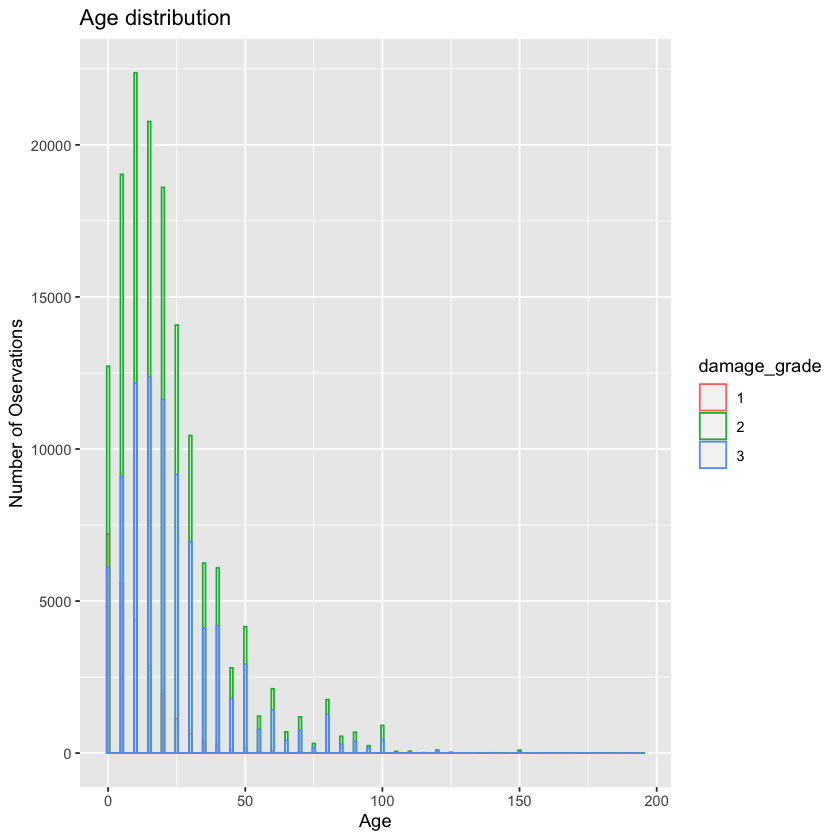

In [20]:
ggplot(
    train_set[c("age", "damage_grade")][temp$age < 200, ],
    aes(
        x = age,
        color = damage_grade)
    ) +
geom_histogram(
    binwidth = 1,
    fill = "white",
    alpha = 0.1,
    position = "identity") +
labs(
    title = "Age distribution",
    x = "Age",
    y = "Number of Oservations")

Analysing the area and height percentages

In [21]:
temp <- train_set[c("area_percentage", "damage_grade")]
dim(temp[temp$area_percentage > 50, ])

[1] 169   2

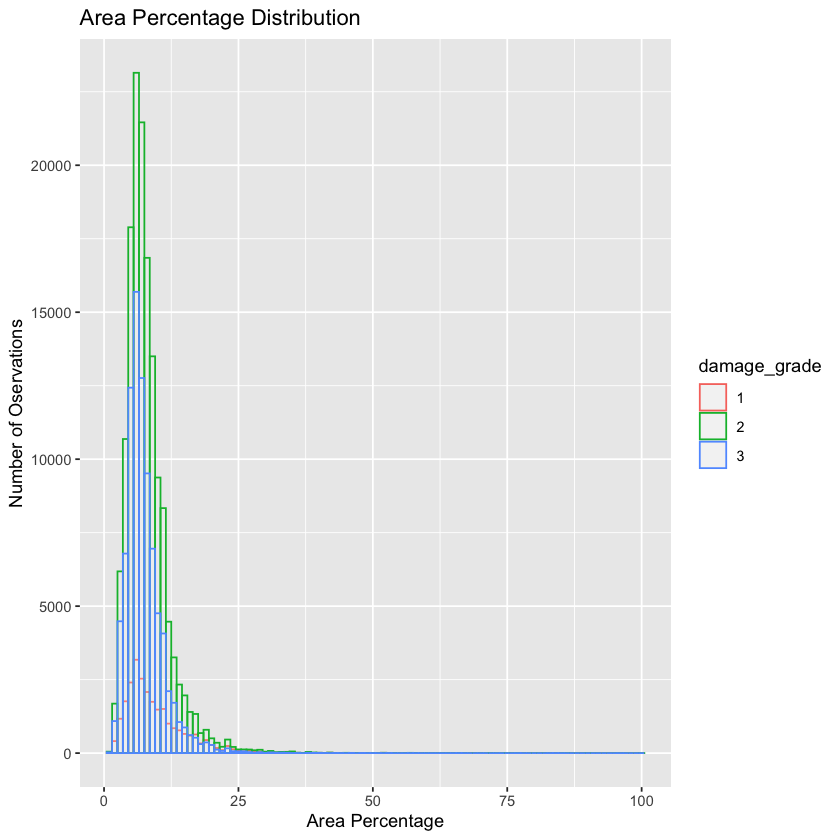

In [22]:
ggplot(
    train_set[c("area_percentage", "damage_grade")],
    aes(
        x = area_percentage,
        color = damage_grade)
    ) +
geom_histogram(
    binwidth = 1,
    fill = "white",
    alpha = 0.1,
    position = "identity") +
labs(
    title = "Area Percentage Distribution",
    x = "Area Percentage",
    y = "Number of Oservations")

In [23]:
temp <- train_set[c("height_percentage", "damage_grade")]
dim(temp[temp$height_percentage > 20, ])

[1] 111   2

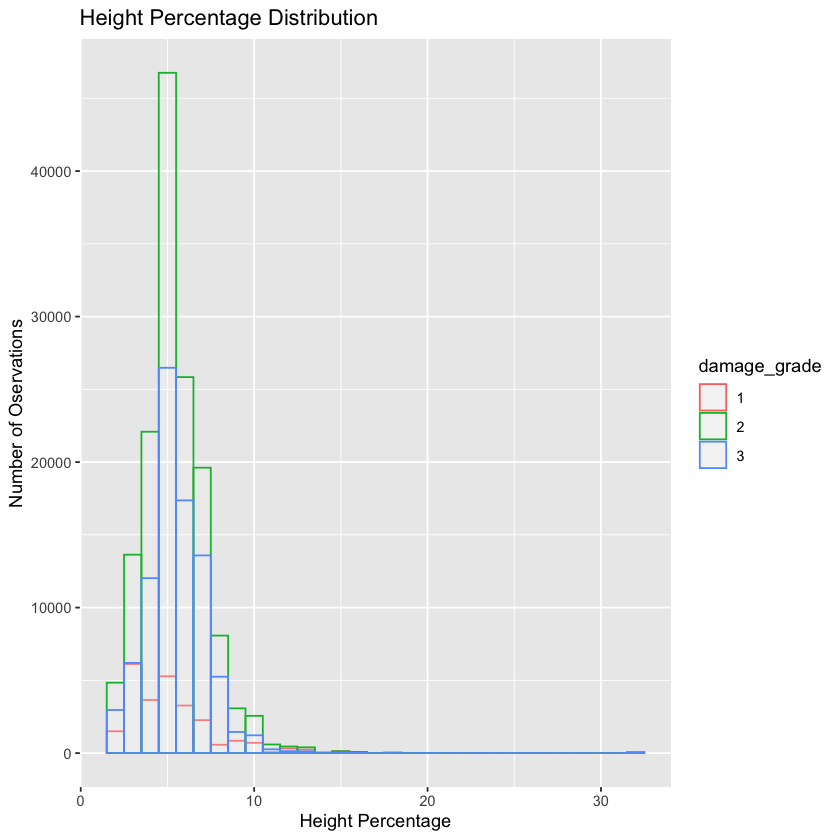

In [24]:
ggplot(
    train_set[c("height_percentage", "damage_grade")],
    aes(
        x = height_percentage,
        color = damage_grade)
    ) +
geom_histogram(
    binwidth = 1,
    fill = "white",
    alpha = 0.1,
    position = "identity") +
labs(
    title = "Height Percentage Distribution",
    x = "Height Percentage",
    y = "Number of Oservations")

In [25]:
temp <- train_set[c("count_families", "damage_grade")]
dim(temp[temp$count_families > 20, ])

[1] 0 2

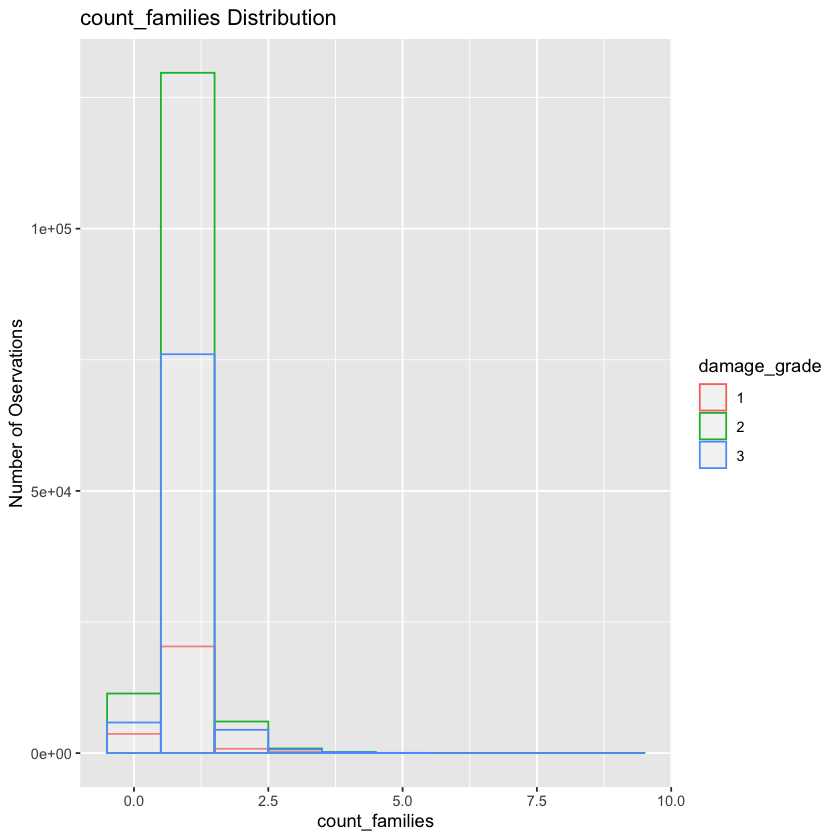

In [26]:
ggplot(
    train_set[c("count_families", "damage_grade")],
    aes(
        x = count_families,
        color = damage_grade)
    ) +
geom_histogram(
    binwidth = 1,
    fill = "white",
    alpha = 0.1,
    position = "identity") +
labs(
    title = "count_families Distribution",
    x = "count_families",
    y = "Number of Oservations")

The dataset looks pretty clean. There is no real missing values. Regarding the features, potentially removing the second and third geo level as it is very diverse in terms of possible levels. Tests will be made later. The other feature that may be worth discarding would be the `has_secondary_use` which is a summary of the last ones. Same goes on for the `building_id` which is a unique id for each observation.

To conclude, some outliers can be seen. However, after some research, the later may not be noise as they can make sense (the `age` variable having 995 years old buildings). Furthermore, in the other variables, there is no noise in the data, in a sense of non-meaning value (negative age or percentage). As note, it could be interesting to have more explainations of features such as the `area_percentage` and the `height_percentage`.

### First cleaning

The first essential cleaning is to remove the `building_id` and the `has_secondary_use` columns. The first being not intersting for models, and the second one being a summary of other variables.

In [27]:
#retrieve target variable and useless features
first_cleaning <- function(feat) {
    #' This function performs the initial cleaning
    #' of a feature dataset. It removes the "building_id"
    #' and "has_secondary_use" columns from the dataset.
    #'
    #' @param feat A data frame containing the feature dataset.
    #' @return The cleaned feature dataset with the
    #' "building_id" and "has_secondary_use" columns removed.
    feat <- subset(feat, select = -c(building_id, has_secondary_use))
    return(feat)
}

In [28]:
features <- first_cleaning(x)

### Engineering Continuous Numerical Variables

The numerical variables are the following

In [29]:
numerical_var <- which(sapply(features[1, ], class) == "integer")
noquote(sprintf("There are %s numerical variables", length(numerical_var))) 

[1] There are 29 numerical variables

#### Standardization of the non-binary numerical variables

After looking at the distribution of the numerical variables, we often observed some sort of Gaussian distribution of the data. We have decided to opt for the standardization of the data to reduce the effect of outliers, center the features values to the mean and scale to a std of 1. 

To calculate standardized values, the formula is:
standardized value = $\dfrac{X – \mu}{\sigma}$,
where X is the observation, μ is the mean, and σ is the standard deviation.

We will however use R built-in function: scale().

In [30]:
standardize <- function(df) {
    #' Standardize a data frame
    #'
    #' Given a data frame as input, the function will standardize the data frame
    #' @param df A data frame to be standardized
    #' @return Returns a standardized data frame
    #' @examples
    #' df <- data.frame(a = c(1, 2, 3), b = c(4, 5, 6), c = c(7, 8, 9))
    #' standardized_df <- standardize(df)
    #' 
    standardized_df <- scale(df)
    return(standardized_df)
}

The only features relevant to normalize are `"age", "count_floors_pre_eq", "area_percentage", "height_percentage", "count_families"`

In [31]:
standardization <- function(feat){
    feat[, c("age", "count_floors_pre_eq",
        "area_percentage", "height_percentage", "count_families")] <- standardize(feat[, c(
        "age", "count_floors_pre_eq",
        "area_percentage", "height_percentage", "count_families"
    )])
    return(feat)
}

In [32]:
features <- standardization(features)

### Engineering Categorical Variables

The categorical variables are the following :

In [33]:
categorical_var <- which(sapply(features[1, ], class) == "factor")
noquote(sprintf("There are %s categorical variables", length(categorical_var)))

[1] There are 8 categorical variables

An interesting check to see if a feature is useless is to assess the number of different levels within a categorical variable. As seen in the documentation and checked here with this function, we see that the dataset is clean on this side. 

In [34]:
check_factors <- function(df, cat_vars) {
   #' Three-Level Categorical Variable Analysis Function
   #'
   #' This function generates a barplot showing the
   #' distribution of each three-level categorical variable
   #' in a given data frame.
   #'
   #' @param df A data frame containing the categorical
   #' variable(s) to be analyzed.
   #' @param categorical_var A vector of indices or column names
   #' specifying the categorical variable(s) to be analyzed.
   #'
   #' @examples
   #' my_data <- data.frame(category = c("A", "B", "C"), value = c(1, 2, 3))
   #' analyze_three_level_factors(my_data, "category")
   #'
   #' @importFrom glue glue
   #'
   #' @export
    for (cat_var in cat_vars) {
       if (nlevels(df[, cat_var]) < 2) {
          print(cat_var)
          print(nlevels(df[, cat_var]))
       }
    }
}
check_factors(features, categorical_var)

It can be interesting to check the distribution of categorical variables with 3 levels. As those one can be of some binary form and have an empty values.

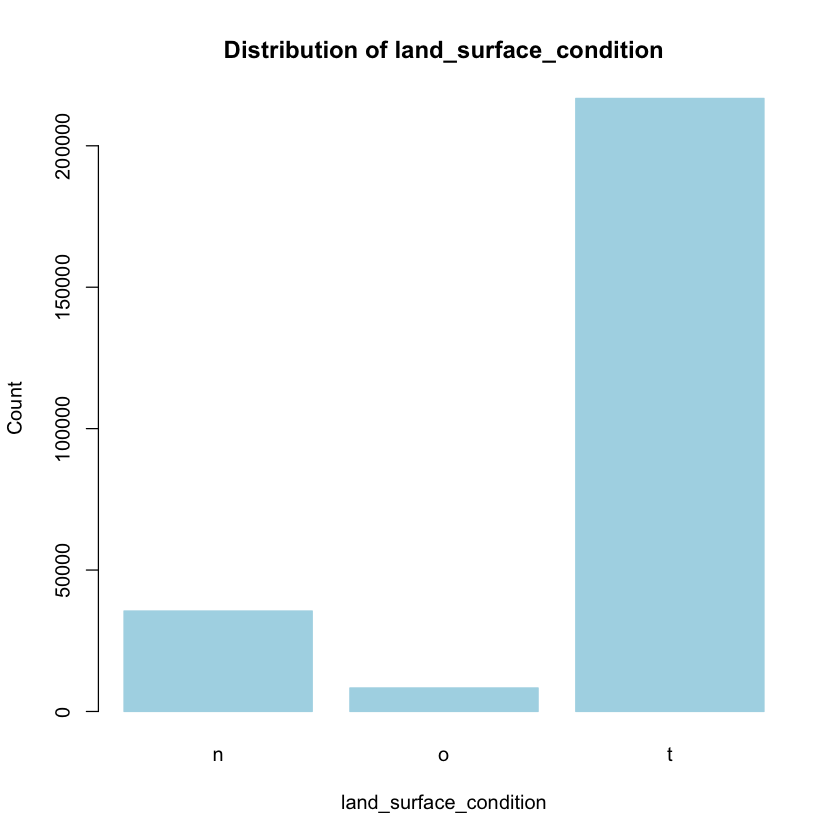

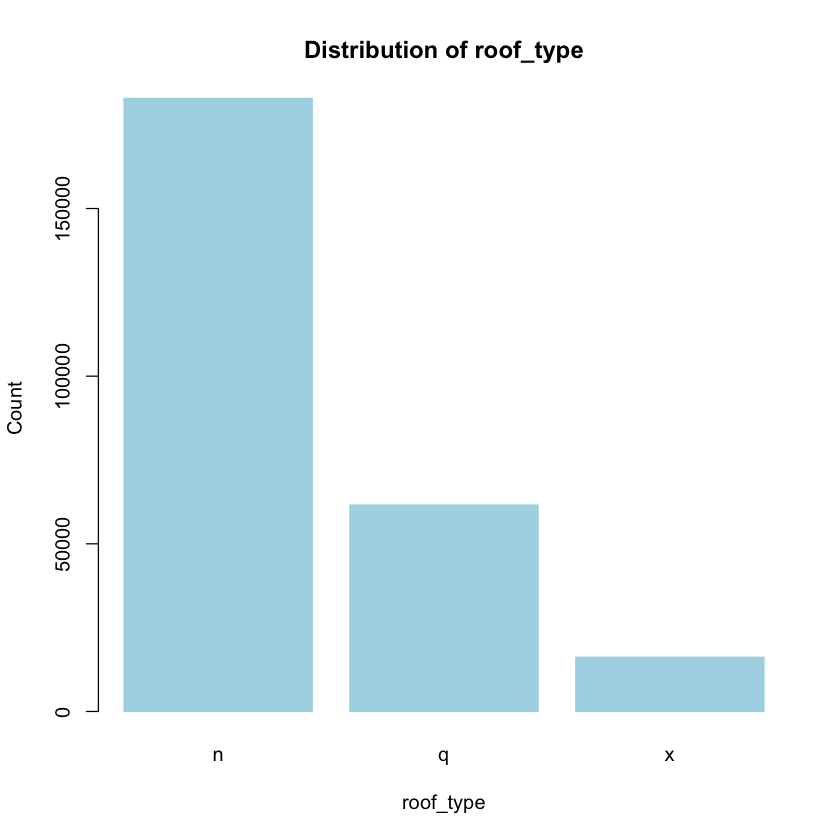

In [35]:
analyze_three_level_factors <- function(df, categorical_var){
   for (cat_var in categorical_var) {
      if (nlevels(df[, cat_var]) == 3) {
         barplot(table(df[, cat_var]),
            main = glue("Distribution of {colnames(df)[cat_var]}"),
            xlab = glue("{colnames(df)[cat_var]}"),
            ylab = "Count",
            col = "lightblue",
            border = "lightblue")
      }
   }
}
analyze_three_level_factors(x, categorical_var)

#### One hot encoding categorical variables

In [36]:
one_hot <- function(df){
    #' One-Hot Encoding Function
    #'
    #' This function performs one-hot encoding on a given data frame.
    #'
    #' @param df A data frame containing the variables to be one-hot encoded.
    #'
    #' @return A new data frame with the original
    #' variables replaced by their one-hot encoded representations.
    #'
    #' @examples
    #' my_data <- data.frame(category = c("A", "B", "C"), value = c(1, 2, 3))
    #' encoded_data <- one_hot(my_data)
    #'
    #' @importFrom caret dummyVars
    #' @importFrom stats predict
    #'
    #' @export
    dum <- dummyVars(" ~ .", data = df)
    df <- data.frame(predict(dum, newdata = df))
    return(df)
}

In [37]:
feat_ohe <- one_hot(features)

### Feature Selection

For the feature selection, we decided to use only filter methods and a simple lasso regression, as we want to be able to input those values into different models. 

#### Embedded method

##### Lasso
Lasso is a regression technique that can be particularly interesting to select features as it can put $\beta$ coefficients to 0. We will use this method as a first gross filter.

No standardization are required for the features because already previously done. Concerning target values, eventhough they are multi-class, we will keep them as such with 1, 2, or 3.

In [38]:
lasso_selection <- function(feat, target) {

    # lasso_selection - Function to select relevant features using Lasso regression

    # Usage:
    #     feat_reduced <- lasso_selection(feat, target)

    # Arguments:
    #     feat: A data matrix containing the features to be used for Lasso regression.
    #     target: A data matrix containing the target variable to be used for Lasso regression.

    # Returns:
    #     A data matrix containing the relevant features selected using Lasso regression.

    # Description:
    #     The `lasso_selection` function uses Lasso regression to identify the relevant features for predicting the target variable. 
    #     It first set the input features and target variable in data matrixes. 
    #     Then, it performs cross-validation using the `cv.glmnet` function to determine the optimal value of lambda, 
    #     which is used to fit the final Lasso regression model using the `glmnet` function. 
    #     The function prints a message indicating which features were deleted because their Beta is null, 
    #     and returns a data matrix containing the relevant features selected by the Lasso regression model.

    set.seed(seed)
    feat_matrix <- data.matrix(feat)
    target_matrix <- data.matrix(target[,"damage_grade"])

    cv_model <- cv.glmnet(feat_matrix, target_matrix, alpha = 1)
    best_lambda <- cv_model$lambda.min

    best_model <- glmnet(feat_matrix, target_matrix, alpha=1, lambda=best_lambda)
    betas <- coef(best_model)

    feat_useless <- c(row.names(which(betas == 0, arr.ind = T)))

    feat_reduced <- data.frame(feat_matrix[, !(colnames(feat_matrix) %in% feat_useless)])

    print(paste(c("The following features were deleted because their Beta is null: ", feat_useless), collapse = " "))

    return(feat_reduced)
}

In [39]:
feat_reduced <- lasso_selection(feat_ohe, y)

[1] "The following features were deleted because their Beta is null:  land_surface_condition.t position.j plan_configuration.d legal_ownership_status.v has_secondary_use_industry"


#### Filter methods

##### mRMR approach

The minimum redundance and maximum relevance is a method used for feature selection. It is iteratevaly selecting features based on the correlation with the target and the set of features  already selected. A variant of this model can be used using the F-score but it gives essentially the same results.

In [40]:
mRMR_selection <- function(feat, target, k = -1, treshold = 0.01, FSCORE = FALSE, treshold_fscore = 10) {
    # Description:
    #     Perform feature selection using the minimum
    #redundancy maximum relevance (mRMR) algorithm.

    # Arguments:
    #     feat: A dataframe containing the features to be selected.
    #     target: A dataframe containing the target variable.
    #     treshold: A numeric value specifying the minimum mRMR
    #     score for a feature to be considered relevant. Default is 0.01.
    #     FSCORE: A logical value indicating whether to use F-score
    #     instead of Pearson correlation coefficient for continuous variables.
    #     Default is FALSE.
    #     treshold_fscore: A numeric value specifying the minimum F-score
    #     for a feature to be considered relevant. Only used if FSCORE is TRUE.
    #     Default is 10.

    # Value:
    #     A dataframe containing the selected features.

    # Details:
    #     The mRMR algorithm ranks features based on their importance
    #     in predicting the target variable, where importance has a relevance
    #     and redundancy component.
    #     Relevance is measured by the F-score or Pearson correlation
    #     coefficient between the feature and the target variable.
    #     Redundancy is measured by the Pearson correlation coefficient
    #     between the feature and previously selected features.
    #     The algorithm works iteratively, selecting one feature at a
    #     time based on the mRMR score. The selected features are returned
    #     as a dataframe.

    if (!is.data.frame(feat)) {
    stop("Error: feat must be a dataframe.")
    }
    feat_index <- c()
    candidates <- 1:ncol(feat)
    feat_score <- c()
    if (k == -1) {
       k <- dim(feat)[2]
    }

    for (i in 1:k) {
        feat_selected <- c()
        scores <- c()
        for (f in candidates){
            if (FSCORE) {
                mrmr_score <- as.numeric(var.test(
                    feat[, f],
                    target$damage_grade,
                    alternative = "two.sided")$estimate)
            } else {
                mrmr_score <- abs(cor(feat[, f], target$damage_grade))
            }

            if (length(feat_index) > 0) {
                f_redundancy <- abs(mean(
                    cor(feat[, f], feat[feat_index])))
                    if (FSCORE) {
                        mrmr_score <- mrmr_score/f_redundancy
                    } else {
                        mrmr_score <- mrmr_score - f_redundancy
                    }
            }
                feat_selected <- c(feat_selected, f)
                scores <- c(scores, mrmr_score)
        }
        d <- cbind(as.data.frame(feat_selected), scores = scores)
        feat_index <- c(feat_index, d[order(-d$scores), ][1, ]$feat_selected)
        feat_score <- c(feat_score, d[order(-d$scores), ][1, ]$scores)
        candidates <- setdiff(candidates, feat_index)
        #remaining candidates that were not taken
    }

    score_matrix <- cbind(feat_index, feat_score)
    print(score_matrix)
    
    if (k == dim(feat)[2]) {
       if (FSCORE) {
            feat_useless_index <- score_matrix[score_matrix[, 2] < treshold_fscore, 1]
        } else {
            feat_useless_index <- score_matrix[score_matrix[, 2] < treshold, 1]
        }
        
        print(paste(c("The following features were deleted because their mRMR score is too low: ", colnames(feat[, feat_useless_index])), collapse = " ")) 
        feat_reduced <- feat[, -feat_useless_index]
        
        plot(feat_score,
        main = "mRMR score for each features")
        abline(h = treshold, col = "#f64975")
    } else {
        print(paste(c("The following features were deleted: ", colnames(feat[, candidates])), collapse = " ")) 
        feat_reduced <- feat[, -candidates]
    }
    
    return(feat_reduced)

}

      feat_index   feat_score
 [1,]         12  0.343355426
 [2,]         16  0.068093878
 [3,]         41  0.057991850
 [4,]         40  0.106490957
 [5,]          4  0.085116734
 [6,]         11  0.076864578
 [7,]         17  0.221687782
 [8,]         20  0.314526861
 [9,]         44  0.233917403
[10,]         24  0.147215233
[11,]         18  0.151254693
[12,]         25  0.155230885
[13,]         13  0.114353378
[14,]         48  0.105345089
[15,]         47  0.097228375
[16,]         14  0.093495299
[17,]         50  0.073223472
[18,]         23  0.080787059
[19,]         46  0.062086095
[20,]          6  0.065416177
[21,]         45  0.062514857
[22,]         53  0.052887143
[23,]         55  0.054202012
[24,]         56  0.052086163
[25,]          1  0.048297497
[26,]         38  0.045695949
[27,]         29  0.043509779
[28,]         42  0.040568658
[29,]         39  0.040557719
[30,]         52  0.028113429
[31,]          2  0.028170623
[32,]          5  0.026643714
[33,]     

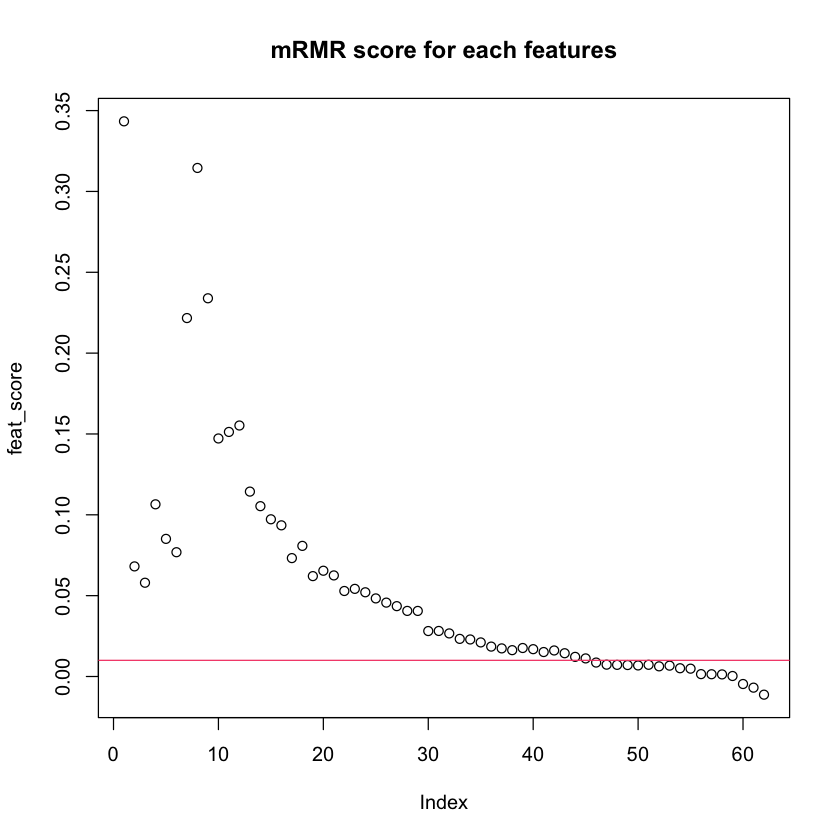

In [41]:
feat_reduced_all <- mRMR_selection(feat_reduced, y)

Looking at the mRMR performed on all features, we can choose to either pick the features kept, or set k=50 features which is more arbitrary. However, it retrieves too many geo levels. We will therefore stick to the treshold of the score chosen (score > 0.01).

In [42]:
#feat_reduced_selected_k <- mRMR_selection(feat_reduced, y, k=50)
#feat_reduced_fscore <- mRMR_selection(feat_reduced, y, FSCORE = TRUE)

##### PCA

We decided to not use the PCA as the features generated are not interpretable, and for the last part of the project, it would be interesting to have the columns interpretable.

In [43]:
pca <- function(df, nb_components) {
    #' This function performs Principal
    #' Component Analysis (PCA) on a given data frame.
    #'
    #' @param df A data frame.
    #' @param nb_components The number of principal components to retain.
    #' @return The result of PCA on the data frame.
    feat_pca <- df
    feat_pca <- prcomp(feat_pca, scale = TRUE)
    return(feat_pca)
}

pca_select <- function(df, feat_pca, nb_components) {
    #' This function selects the specified number of principal
    #' components from the PCA result and returns them.
    #'
    #' @param df A data frame.
    #' @param feat_pca The result of PCA performed on the original data frame.
    #' @param nb_components The number of principal components to select.
    #' @return The selected principal components.
    feat_pca <- predict(feat_pca, newdata = df)[, 1:nb_components]
    return(feat_pca)
}

### Data pre-processing pipeline
We decided also to create new artificial features as those may help the model have a better performance. As such, we decided to create non linear combinations between numerical pairs in the dataset as seen below. There is also the full pipeline.

In [44]:
create_nonlinear_comb <- function(df, prod = FALSE, div = FALSE) {
    #' Create Nonlinear Combinations
    #'
    #' This function takes a data frame 'df' and creates
    #' nonlinear combinations of the columns using division and multiplication.
    #'
    #' @param df A data frame
    #' @param prod Logical, indicating whether to create
    #' nonlinear combinations using multiplication
    #' @param div Logical, indicating whether to create
    #' nonlinear combinations using division
    #' @return Returns a data frame with nonlinear combinations of the columns
    num_cols <- c(
        "age", "count_floors_pre_eq",
        "area_percentage", "height_percentage", "count_families"
    )
    copy <- df[, num_cols]
    epsilon <- .1
    copy[copy == 0] <- epsilon
    indeces <- list()
    for (nc in 1:length(num_cols)) {
        for (ncpair in 1:length(num_cols)) {
            if (ncpair > nc) {
                indeces <- append(indeces, list(list(nc, ncpair)))
            }
        }
    }
    for (ind in indeces) {
        if (div) {
            temp <- copy[, num_cols[ind[[1]]]] / copy[, num_cols[ind[[2]]]]
            df[, glue("{num_cols[ind[[1]]]}_div_{num_cols[ind[[2]]]}")] <- temp
        }
        if (prod) {
            temp <- copy[, num_cols[ind[[1]]]] * copy[, num_cols[ind[[2]]]]
            df[, glue("{num_cols[ind[[1]]]}_prod_{num_cols[ind[[2]]]}")] <- temp
        }
    }
    return(df)
}

first_preprocessing_training <- function(feat) {
    #' First Preprocessing Training
    #'
    #' This function takes a data frame 'feat'
    #' and applies cleaning, standardization,
    #' creates nonlinear combinations using division,
    #' and one-hot encoding.
    #'
    #' @param feat A data frame
    #' @return Returns a processed data frame
    feat <- first_cleaning(feat)
    feat <- standardization(feat)
    feat <- create_nonlinear_comb(feat, div = TRUE)
    feat <- one_hot(feat)
    return(feat)
}

feat_red_lasso_only <- function(feat, target) {
    #' Feature Selection using Lasso
    #'
    #' This function takes a data frame 'feat'
    #' and a target variable 'target' and applies
    #' Lasso feature selection.
    #'
    #' @param feat A data frame
    #' @param target A target variable
    #' @return Returns a processed data frame
    feat <- lasso_selection(feat, target)
    return(feat)
}

feat_mRMR <- function(feat, target) {
    #' This function takes a data frame 'feat'
    #' and a target variable 'target' and applies mRMR feature selection.
    #'
    #' @param feat A data frame
    #' @param target A target variable
    #' @return Returns a processed data frame
    feat <- mRMR_selection(feat, target)
    return(feat)
}

preprocessing_full <- function(df, y) {
    #' Full Preprocessing
    #'
    #' This function takes a data frame 'df' and a target variable
    #' 'y' and applies cleaning, standardization, creates nonlinear
    #' combinations using division, one-hot encoding,
    #' Lasso feature selection, and mRMR feature selection.
    #'
    #' @param df A data frame
    #' @param y A target variable
    #' @return Returns a processed data frame
    feat <- first_cleaning(feat)
    feat <- standardization(feat)
    feat <- create_nonlinear_comb(feat, div = TRUE)
    feat <- one_hot(feat)
    feat <- lasso_selection(feat, target)
    feat <- mRMR_selection(feat, target)
    return(feat)
}

In [45]:
# Reading the data
x <- read.csv("data/train_values.csv", stringsAsFactors = TRUE)
y <- read.csv("data/train_labels.csv", stringsAsFactors = TRUE)

In [46]:
# Training the features or not. Keeping on false as it can take
# long time (5 min). We alreadu saved the interesing columns.
retrain_features <- FALSE

if (retrain_features) {
    print(glue("INFO - {Sys.time()} : Processing the data without filtering ..."))
    processing_no_red <- first_preprocessing_training(x)

    print(glue("INFO - {Sys.time()} : {dim(processing_no_red)[2]} training dimensions"))

    print(glue("INFO - {Sys.time()} : Processing the data with only the lasso filtering ..."))
    train_lasso <- feat_red_lasso_only(processing_no_red, y)
    saveRDS(colnames(train_lasso), file = "results/col_lasso_only.rds")

    print(glue("INFO - {Sys.time()} : Processing the data with the lasso and mRMR filtering ..."))
    train <- feat_mRMR(train_lasso, y)
    saveRDS(colnames(train), file = "results/col_lasso_mrmr.rds")
} else {
    print(glue("INFO - {Sys.time()} : Processing the data without filtering ..."))
    processing_no_red <- first_preprocessing_training(x)

    print(glue("INFO - {Sys.time()} : Loading lasso only"))
    l <- readRDS("results/col_lasso_only.rds")
    train_lasso <- processing_no_red[l]

    print(glue("INFO - {Sys.time()} : Loading lasso and mRMR"))
    l <- readRDS("results/col_lasso_mrmr.rds")
    train <- processing_no_red[l]
}

train_lasso <- cbind(train_lasso, damage_grade = as.factor(y$damage_grade))
train <- cbind(train, damage_grade = as.factor(y$damage_grade))

INFO - 2023-05-19 13:00:15.974321 : Processing the data without filtering ...
INFO - 2023-05-19 13:00:18.693741 : Loading lasso only
INFO - 2023-05-19 13:00:18.694795 : Loading lasso and mRMR


## Model Selection Procedure

For the model selection procedure, we decided to run grid searchs for each models, cross validate on 5 folds. Also, we set the similar seeds across the models so the cross validation folds are the same and the comparison is fair. As a note, we decided to subsample the dataset to compare models first. In fact, this procedure would have take weeks on the full dataset (assume a random forest, with 6 combinations, crossvalidated 5 times. It gives 30 models to assess). Even though, we are fully aware that the results does not reflect the full performance of models, however, we may compare them to each other relatively, and finally train the winner on the full data and search furthermore for his sets of best parameters only.

In [47]:
# Loading the scripts for F1 micro score
source("utils.r")

While subsampling, we could see that the target distribution is preserved using just the following method.

In [48]:
down <- 75000
sub_train <- train[1:down, ]
sub_train_lasso <- train_lasso[1:down, ]

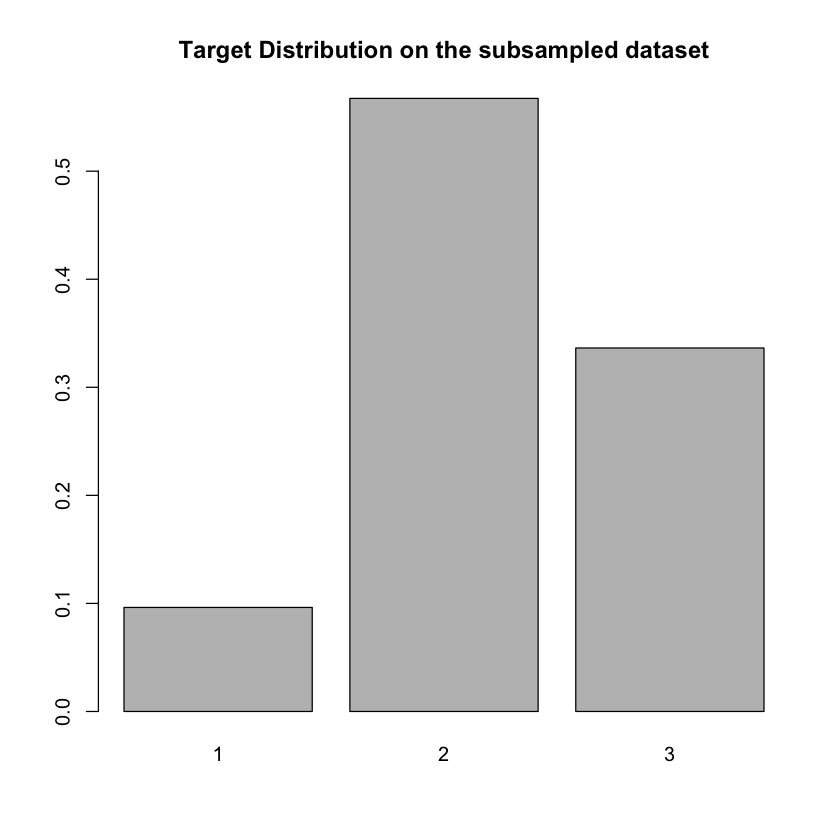

In [49]:
barplot(table(sub_train$damage_grade) / sum(table(sub_train$damage_grade)),
    main = "Target Distribution on the subsampled dataset")

### Manual Multiclass Strategy Implementation 
This section introduces 3 techniques for multiclassification strategies. As such, the following cells are able to convert any classifier to be able to deal with multiclass problems. We developped these cells as we thought initially the project needed to convert any classifiers to multiclass models, however, for the rest of notebooks, we didn't train models with these strategies as models were already able to deal with multiclass problems. We worked on three different strategies introduced in the lectures.

#### One-vs-Rest strategy
One vs Rest is a method that basically is creating as much models as the number of classes. It then compare one class against all the others.

##### Tree based technique : Random Forest

In [50]:
randomforest_cv_ovr <- function(k,
    df,
    ntrees = 100,
    mtry = 20) {
    #' This function performs k-fold cross-validation using the
    #' Random Forest model with One-vs-Rest strategy for multi-class
    #' classification.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param ntrees An integer, the number of trees to grow
    #' @param mtry An integer, the number of variables randomly
    #' sampled as candidates at each split
    #' @return Returns a vector of F1 scores
    #' 
    find_max_colname <- function(row) {
    #' Obtain the label class name
        return(which.max(row))
    }

    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    f1_micros <- c()

    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the Random Forest model : {ntrees} trees - {mtry} samples"))

    for (i in 1:k){
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        #Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        #Take the remaining groups as a training data
        train_data <- df[-splits[[i]],]

        # Splitting the datasets
        x_train <- subset(train_data, select = -c(damage_grade))
        y_train <- train_data$damage_grade
        x_test <- subset(test_data, select = -c(damage_grade))
        y_test <- test_data$damage_grade

        vars <- as.numeric(levels(y_test))
        predictions <- matrix(ncol = 0, nrow = length(y_test))

        # One-vs-rest model
        for (var in vars){
            print(glue("INFO - {Sys.time()} : OVR {var}/{length(vars)}"))
            flush.console()
            # Turning the multi classification into binary problem
            y_bin_train <- case_when(y_train == var ~ 1, y_train != var ~ 0)
            # Training model
            rf <- randomForest(
                x_train,
                as.factor(y_bin_train),
                ntree = ntrees,
                mtry = mtry,
                )
            preds <- predict(rf, x_test, type = "prob")
            predictions <- cbind(predictions, var = preds[, 2])
        }
        colnames(predictions) <- vars
        # Assessing the prediciton as the max of the probas
        predictions <- as.data.frame(cbind(
            predictions,
            pred = apply(predictions, MARGIN = 1, FUN = find_max_colname)))
        # adding the F1-micro
        f1_micros <- c(f1_micros, F1_Score_micro(y_test, predictions$pred))
    }
    return(f1_micros)
}

In [51]:
grid_search_rf_ovr <- function(df, k, save_data = TRUE) {
   #' Grid Search for Random Forest with Cross-Validation (One-vs-Rest)
   #'
   #' This function performs a grid search to find the optimal
   #' values for the hyperparameters 'ntrees' and 'mtry' for
   #' the Random Forest model with One-vs-Rest strategy for
   #' multi-class classification.
   #'
   #' @param df A data frame, the input data
   #' @param k An integer, the number of folds for cross-validation
   #' @param save_data A boolean, whether or not to save the results to a file
   #' @return Returns a data frame with the results of the grid search
   #'
   ntrees <- c(100, 500, 1000)
   mtrys <- c(10, 20, 30)
   results <- data.frame(
      Ntree = numeric(),
      Mtry = numeric(),
      Avg_f1 = numeric(),
      Std_f1 = numeric())
   for (ntree in ntrees) {
      for (mtry in mtrys) {
         f1_micro <- randomforest_cv_ovr(k, df, ntrees = ntree, mtry = mtry)
         results[nrow(results) + 1, ] <- c(ntree,
            mtry,
            mean(f1_micro),
            sd(f1_micro))
      }
   }
   if (save_data) {
      print(glue("INFO - {Sys.time()} : Saving results ..."))
      saveRDS(results, file= glue("data/results/RF_OVR_{k}.rds"))
   }
   return(results)
}

In [52]:
# This cell take very long time to run
#grid_search_rf_ovr(sub_train, 5)

##### Support vector machine (SVM)

In [53]:
svm_cv_ovr <- function(k,
    df, kernel, gamma, cost) {
        #' This function performs k-fold cross-validation using the
        #' SVM model with One-vs-Rest strategy for multi-class
        #' classification.
        #'
        #' @param k An integer, the number of folds for cross-validation
        #' @param df A data frame, the input data
        #' @param ntrees An integer, the number of trees to grow
        #' @param mtry An integer, the number of variables randomly
        #' sampled as candidates at each split
        #' @return Returns a vector of F1 scores
        #'

    find_max_colname <- function(row) {
        return(which.max(row))
    }

    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    f1_micros <- c()

    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the SVM model : kernel - {kernel}, gamma - {gamma}, cost - {cost}"))

    for (i in 1:k){
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        #Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        #Take the remaining groups as a training data
        train_data <- df[-splits[[i]],]

        # Splitting the datasets
        x_train <- subset(train_data, select = -c(damage_grade))
        y_train <- train_data$damage_grade
        x_test <- subset(test_data, select = -c(damage_grade))
        y_test <- test_data$damage_grade

        vars <- as.numeric(levels(y_test))
        predictions <- matrix(ncol = 0, nrow = length(y_test))

        # One-vs-rest model
        for (var in vars){
            print(glue("INFO - {Sys.time()} : OVR {var}/{length(vars)}"))
            flush.console()
            # Turning the multi classification into binary problem
            y_bin_train <- case_when(y_train == var ~ 1, y_train != var ~ 0)
            # Training model
            sv <- svm(
                train_data,
                as.factor(y_bin_train),
                scale = FALSE,
                probability = TRUE,
                kernel = kernel,
                gamma = gamma,
                cost = cost)
            preds <- predict(sv, test_data, probability = TRUE)
            preds <- attr(preds, "probabilities")
            predictions <- cbind(predictions, var = preds[, 2])
        }
        colnames(predictions) <- vars
        # Assessing the prediciton as the max of the probas
        predictions <- as.data.frame(cbind(
            predictions,
            pred = apply(predictions, MARGIN = 1, FUN = find_max_colname)))
        # adding the F1-micro
        f1_micros <- c(f1_micros, F1_Score_micro(y_test, predictions$pred))
    }
    return(f1_micros)
}

In [54]:
grid_search_svm_ovr <- function(df, k, save_data = TRUE) {
   #' Grid Search for SVM with Cross-Validation (One-vs-Rest)
   #'
   #' This function performs a grid search to find the optimal values for the
   #' hyperparameters 'kernel', 'gamma' and 'cost' for the SVM model
   #' with One-vs-Rest strategy for multi-class classification.
   #'
   #' @param df A data frame, the input data
   #' @param k An integer, the number of folds for cross-validation
   #' @param save_data A boolean, whether or not to save the results to a file
   #' @return Returns a data frame with the results of the grid search
   kernels <- c("linear", "radial")
   gammas <- c(0.0001, 0.001, 0.01)
   costs <- c(2^{9}, 2^{11})
   results <- data.frame(
      kernel = character(),
      gamma = numeric(),
      cost = numeric(),
      Avg_f1 = numeric(),
      Std_f1 = numeric())
   for (kernel in kernels) {
      for (gamma in gammas) {
         for (cost in costs) {
            f1_micro <- svm_cv_ovr(k,
               df,
               kernel,
               gamma,
               cost)
            results[nrow(results) + 1, ] <- c(kernel,
               gamma,
               cost,
               mean(f1_micro),
               sd(f1_micro))
         }
      }
   }
   if (save_data) {
      print(glue("INFO - {Sys.time()} : Saving results ..."))
      saveRDS(results, file= glue("data/results/SVM_OVR_{k}.rds"))
   }
   return(results)
}

In [55]:
# This cells take a long time before running
#grid_search_svm_ovr(sub_train, 5)

#### Pairwise strategy

In this strategy, we compare a model trained to discreminate between two classes. So if we have N classes, it will need to build $\dfrac{N(N-1)}{2}$ models.

In [56]:
get_pairs <- function(y) {
    #' This function takes a vector of values, y, and
    #' returns a list of all possible pairs of unique values from the vector.
    #' The pairs are represented as a list of lists,
    #' where each inner list contains two values.
    #' The pairs are determined by iterating over the unique values
    #' in the vector and creating a pair for each unique value combination.
    #' The order of the pairs is determined by the order
    #' of the unique values in the vector.
    #'
    #' @param y A vector of values.
    #'
    #' @return A list of lists representing all possible 
    #' pairs of unique values from the input vector.
    vars <- as.numeric(levels(factor(y)))
    indexes <- list()
    pairs <- list()
    for (i in 1:length(vars)) {
        for (j in 1:length(vars)){
            if(j > i){
                index_pair <- list(i, j)
                indexes <- append(indexes, list(index_pair))
            }
        }
    }
    for (pair_index in indexes) {
        pair <- list(vars[pair_index[[1]]], vars[pair_index[[2]]])
        pairs <- append(pairs, list(pair))
    }
    return(pairs)
}

##### Tree-based technique : Random Forest

In [57]:
randomforest_cv_ovo <- function(k,
    df,
    ntrees = 100,
    mtry = 20) {
    #' Random Forest with Cross-Validation (One-vs-One)
    #'
    #' This function performs a k-fold cross-validation to evaluate
    #' the performance of a Random Forest model with One-vs-One strategy
    #' for multi-class classification.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param ntrees An integer, the number of trees in the Random Forest model
    #' @param mtry An integer, the number of features to be
    #' selected at each split
    #' @return Returns a vector with the F1-score for each fold

    aggregate_results <- function(x) {
        prob_1 <- as.numeric(x['list(1, 2)'])
            + as.numeric(x['list(1, 3)'])
        prob_2 <- (1 - as.numeric(x['list(1, 2)']))
            + as.numeric(x['list(2, 3)'])
        prob_3 <- (1 - as.numeric(x['list(1, 3)']))
        + (1 - as.numeric(x['list(2, 3)']))
        vals <- list("1" = prob_1, "2" = prob_2, "3" = prob_3)
        return(as.numeric(which.max(vals)))
    }

    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    f1_micros <- c()

    pairs <- get_pairs(df$damage_grade)
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the Random Forest model : {ntrees} trees - {mtry} samples"))

    for (i in 1:k){
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        #Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        #Take the remaining groups as a training data
        train_data <- df[-splits[[i]], ]

        predictions <- matrix(ncol = 0, nrow = nrow(test_data))
        i <- 1
        # One-vs-rest model
        for (pair in pairs){
            print(glue("INFO - {Sys.time()} : OVO {i}/{length(pairs)}"))
            flush.console()
            x_train_bin <- train_data[
                (train_data$damage_grade == pair[1]) |
                (train_data$damage_grade == pair[2]), ]

            # Splitting the datasets
            x_train <- subset(x_train_bin, select = -c(damage_grade))
            y_train <- x_train_bin$damage_grade
            x_test <- subset(test_data, select = -c(damage_grade))

            # Turning the output binary
            y_bin_train <- case_when(y_train == pair[1] ~ 1,
                y_train == pair[2] ~ 0)
            # Training model
            rf <- randomForest(
                x_train,
                as.factor(y_bin_train),
                ntree = ntrees,
                mtry = mtry,
                )

            preds <- predict(rf, x_test, type = "prob")
            predictions <- cbind(predictions, var = preds[, 2])
            i <- i + 1
        }
        colnames(predictions) <- pairs
        # Assessing the prediciton as the max of the probas
        predictions <- as.data.frame(cbind(
            predictions,
            pred = apply(predictions, MARGIN = 1, FUN = aggregate_results)))
        # adding the F1-micro
        f1_micros <- c(f1_micros,
            F1_Score_micro(test_data$damage_grade, predictions$pred))
    }
    return(f1_micros)
}

In [58]:
grid_search_rf_ovo <- function(df, k, save_data = TRUE) {
   #' Grid Search for Random Forest with Cross-Validation (One-vs-One)
   #'
   #' This function performs a grid search to find the optimal
   #' values for the hyperparameters 'ntrees' and 'mtry' for
   #' the Random Forest model with One-vs-One strategy for
   #' multi-class classification.
   #'
   #' @param df A data frame, the input data
   #' @param k An integer, the number of folds for cross-validation
   #' @param save_data A boolean, whether or not to save the results to a file
   #' @return Returns a data frame with the results of the grid search
   #'
   ntrees <- c(100, 500, 1000)
   mtrys <- c(10, 20, 30)
   results <- data.frame(
      Ntree = numeric(),
      Mtry = numeric(),
      Avg_f1 = numeric(),
      Std_f1 = numeric())
   for (ntree in ntrees) {
      for (mtry in mtrys) {
         f1_micro <- randomforest_cv_ovo(k, df, ntrees = ntree, mtry = mtry)
         results[nrow(results) + 1, ] <- c(ntree,
            mtry,
            mean(f1_micro),
            sd(f1_micro))
      }
   }
   if (save_data) {
      print(glue("INFO - {Sys.time()} : Saving results ..."))
      saveRDS(results, file= glue("data/results/RF_OVO_{k}.rds"))
   }
   return(results)
}

In [59]:
# This cell take long time to run
# grid_search_rf_ovo(sub_train, 5)

##### Support Vector Machine

In [60]:
svm_cv_ovo <- function(
    k,
    df,
    kernel, gamma, cost) {
    #' SVM with Cross-Validation (One-vs-One)
    #'
    #' This function performs a k-fold cross-validation to
    #' evaluate the performance of an SVM model with
    #' One-vs-One strategy for multi-class classification.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param kernel A character, the kernel function to be
    #' used in the SVM model
    #' @param gamma A numeric, the gamma parameter for the kernel function
    #' @param cost A numeric, the cost parameter for the SVM model
    #' @return Returns a vector with the F1-score for each fold
    #'
    aggregate_results <- function(x) {
        prob_1 <- as.numeric(x["list(1, 2)"])
        +as.numeric(x["list(1, 3)"])
        prob_2 <- (1 - as.numeric(x["list(1, 2)"]))
        +as.numeric(x["list(2, 3)"])
        prob_3 <- (1 - as.numeric(x["list(1, 3)"]))
        +(1 - as.numeric(x["list(2, 3)"]))
        vals <- list("1" = prob_1, "2" = prob_2, "3" = prob_3)
        return(as.numeric(which.max(vals)))
    }

    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    f1_micros <- c()

    pairs <- get_pairs(df$damage_grade)
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the SVM model : kernel - {kernel}, gamma - {gamma}, cost - {cost}"))

    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        # Take the remaining groups as a training data
        train_data <- df[-splits[[i]], ]

        predictions <- matrix(ncol = 0, nrow = nrow(test_data))
        i <- 1
        # One-vs-rest model
        for (pair in pairs) {
            print(glue("INFO - {Sys.time()} : OVO {i}/{length(pairs)}"))
            flush.console()
            x_train_bin <- train_data[
                (train_data$damage_grade == pair[1]) |
                    (train_data$damage_grade == pair[2]),
            ]

            # Splitting the datasets
            x_train <- subset(x_train_bin, select = -c(damage_grade))
            y_train <- x_train_bin$damage_grade
            x_test <- subset(test_data, select = -c(damage_grade))

            # Turning the output binary
            y_bin_train <- case_when(
                y_train == pair[1] ~ 1,
                y_train == pair[2] ~ 0
            )
            # Training model
            sv <- svm(
                x_train,
                as.factor(y_bin_train),
                scale = FALSE,
                probability = TRUE,
                kernel = kernel,
                gamma = gamma,
                cost = cost
            )
            preds <- predict(sv, x_test, probability = TRUE)
            preds <- attr(preds, "probabilities")
            predictions <- cbind(predictions, var = preds[, 2])
            i <- i + 1
        }
        colnames(predictions) <- pairs
        # Assessing the prediciton as the max of the probas
        predictions <- as.data.frame(cbind(
            predictions,
            pred = apply(predictions, MARGIN = 1, FUN = aggregate_results)
        ))
        # adding the F1-micro
        f1_micros <- c(
            f1_micros,
            F1_Score_micro(test_data$damage_grade, predictions$pred)
        )
    }
    return(f1_micros)
}

In [61]:
grid_search_svm_ovo <- function(df, k, save_data = TRUE) {
    #' Grid Search for SVM with Cross-Validation (One-vs-One)
    #'
    #' This function performs a grid search to find the optimal values for the
    #' hyperparameters 'kernel', 'gamma' and 'cost' for the SVM model
    #' with One-vs-Rest strategy for multi-class classification.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param save_data A boolean, whether or not to save the results to a file
    #' @return Returns a data frame with the results of the grid search
    kernels <- c("linear", "radial")
    gammas <- c(0.0001, 0.001, 0.01)
    costs <- c(2^{
        9
    }, 2^{
        11
    })
    results <- data.frame(
        kernel = character(),
        gamma = numeric(),
        cost = numeric(),
        Avg_f1 = numeric(),
        Std_f1 = numeric()
    )
    for (kernel in kernels) {
        for (gamma in gammas) {
            for (cost in costs) {
                f1_micro <- svm_cv_ovo(
                    k,
                    df,
                    kernel,
                    gamma,
                    cost
                )
                results[nrow(results) + 1, ] <- c(
                    kernel,
                    gamma,
                    cost,
                    mean(f1_micro),
                    sd(f1_micro)
                )
            }
        }
    }
    if (save_data) {
        print(glue("INFO - {Sys.time()} : Saving results ..."))
        saveRDS(results, file = glue("data/results/SVM_OVO_{k}.rds"))
    }
    return(results)
}

In [62]:
# This cell take very long time
# grid_search_svm_ovo(sub_train, 5)

#### Coding strategy

In this case, we encode on two bits the target, and we tried to predict the first bit using a model, then the second bit using another model.

In [63]:
mapping <- list("1" = c(0, 0), "2" = c(1, 0), "3" = c(1, 1))

In [64]:
encode_target <- function(df, target, mapping) {
    #' This function takes a data frame, df, a target
    #' variable name, target, and a mapping of target
    #' values to their encoded representations, mapping.
    #' It encodes the target variable values in the data
    #' frame using the provided mapping and adds the encoded
    #' values as additional columns in the data frame.
    #' The encoded values are obtained by applying the
    #' encoding function to each target
    #' value using the mapping.
    #' The resulting encoded values are then transposed,
    #' and their column names are set as "first_encoding" and "second_encoding".
    #' The final output is a new data frame obtained by
    #' concatenating the original data frame with the encoded values.
    #'
    #' @param df A data frame.
    #' @param target The name of the target variable in the data frame.
    #' @param mapping A mapping of target values to their
    #' encoded representations.
    #'
    #' @return A new data frame obtained by concatenating the original
    #' data frame with the encoded values of the target variable.
    encoded <- t(
        apply(
            df[c(target)],
            MARGIN = 1,
            FUN = function(t) return(mapping[[t]])))
    colnames(encoded) <- c("first_encoding", "second_encoding")
    return(cbind(df, encoded))
}

encoded_sub_train <- encode_target(sub_train, "damage_grade", mapping)

##### Tree-based technique : Random Forest

In [65]:
coding_cv_rf <- function(
    k, df, ntrees = 100,
    mtry = 20, number_cols_encoded = 2, mapping) {
    #' Random Forest with Cross-Validation (Coding)
    #'
    #' This function performs a k-fold cross-validation to
    #' evaluate the performance of a Random Forest model with
    #' coding strategy for multi-class classification.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param ntrees An integer, the number of trees to be
    #' used in the Random Forest model
    #' @param mtry An integer, the number of variables to be
    #' used in each split of the Random Forest model
    #' @param number_cols_encoded An integer, the number of columns
    #' to be used for encoding categorical variables
    #' @param mapping A named list, the mapping between the encoded
    #' values and the original classes
    #' @return Returns a vector with the F1-score for each fold

    decode <- function(rec) {
        map <- c(
            as.numeric(rec[["first_encoding"]]),
            as.numeric(rec[["second_encoding"]])
        )

        if (identical(map, c(0, 1))) {
            # Handle the case where the known value is (0, 1)
            matching_indices <- sample(length(mapping), 1)
        } else {
            matching_indices <- which(
                sapply(mapping, function(x) identical(x, map)))
        }

        class <- as.numeric(names(mapping)[matching_indices])
        return(class)
    }
    
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the Random Forest model : {ntrees} trees - {mtry} samples"))

    # Shuffle the dataset randomly.
    set.seed(seed)
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    encodings <- tail(colnames(df), number_cols_encoded)

    f1_micros <- c()

    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        test_data_t <- test_data$damage_grade
        test_data_wt <- test_data[
            ,
            !names(test_data) %in% c("damage_grade", encodings)
        ]

        # Take the remaining groups as a training data
        train_data <- subset(df[-splits[[i]], ], select = -c(damage_grade))
        predictions <- matrix(ncol = 0, nrow = length(test_data_t))
        i <- 0
        for (encoding in encodings) {
            print(glue("INFO - {Sys.time()} : Encoding {i+1}/{length(encodings)}"))
            temp_x_train <- train_data[
                ,
                !names(train_data) %in% c(encodings)
            ]
            temp_y_train <- train_data[, encoding]
            # Training model
            rf <- randomForest(
                temp_x_train,
                as.factor(temp_y_train),
                ntree = ntrees,
                mtry = mtry,
            )

            preds <- predict(rf, test_data_wt)
            predictions <- cbind.data.frame(predictions, var = preds)
            i <- i + 1
        }
        colnames(predictions) <- encodings
        predictions <- as.data.frame(cbind(
            predictions,
            pred = apply(predictions, MARGIN = 1, FUN = decode)
        ))
        # adding the F1-micro
        f1_micros <- c(f1_micros, F1_Score_micro(test_data_t, predictions$pred))
    }
    return(f1_micros)
}


In [66]:
grid_search_rf_c <- function(df, k, mapping, save_data = TRUE) {
    #' Grid Search for Random Forest with Cross-Validation (coding)
    #'
    #' This function performs a grid search to find the optimal
    #' values for the hyperparameters 'ntrees' and 'mtry' for
    #' the Random Forest model with One-vs-One strategy for
    #' multi-class classification.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param save_data A boolean, whether or not to save the results to a file
    #' @return Returns a data frame with the results of the grid search
    #'
    ntrees <- c(100, 500, 1000)
    mtrys <- c(10, 20, 30)
    results <- data.frame(
        Ntree = numeric(),
        Mtry = numeric(),
        Avg_f1 = numeric(),
        Std_f1 = numeric()
    )
    for (ntree in ntrees) {
        for (mtry in mtrys) {
            f1_micro <- coding_cv_rf(
                k,
                df,
                ntrees = ntree,
                mtry = mtry,
                mapping = mapping)
            results[nrow(results) + 1, ] <- c(
                ntree,
                mtry,
                mean(f1_micro),
                sd(f1_micro)
            )
        }
    }
    if (save_data) {
        print(glue("INFO - {Sys.time()} : Saving results ..."))
        saveRDS(results, file = glue("data/results/RF_c_{k}.rds"))
    }
    return(results)
}
#grid_search_rf_c(encoded_sub_train, 5, mapping)

##### Support vector machine (SVM)

In [67]:
coding_cv_svm <- function(
    k, df, kernel, gamma, cost, number_cols_encoded = 2, mapping) {
    #' SVM with Cross-Validation (Coding)
    #'
    #' This function performs a k-fold cross-validation to
    #' evaluate the performance of an SVM model with coding
    #' strategy for multi-class classification.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param kernel A string, the type of kernel to be used in the SVM model
    #' @param gamma A numeric, the kernel coefficient for the 'rbf',
    #'  'poly' and 'sigmoid' kernels
    #' @param cost A numeric, the cost parameter
    #' for the SVM model
    #' @param number_cols_encoded An integer, the number of
    #' columns to be used for encoding categorical variables
    #' @param mapping A named list, the mapping between
    #' the encoded values and the original classes
    decode <- function(rec) {
        map <- c(
            as.numeric(rec[["first_encoding"]]),
            as.numeric(rec[["second_encoding"]])
        )

        if (identical(map, c(0, 1))) {
            # Handle the case where the known value is (0, 1)
            matching_indices <- sample(length(mapping), 1)
        } else {
            matching_indices <- which(
                sapply(mapping, function(x) identical(x, map)))
        }

        class <- as.numeric(names(mapping)[matching_indices])
        return(class)
    }
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the SVM model : kernel - {kernel}, gamma - {gamma}, cost - {cost}"))

    # Shuffle the dataset randomly.
    set.seed(seed)
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    encodings <- tail(colnames(df), number_cols_encoded)

    f1_micros <- c()

    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        test_data_t <- test_data$damage_grade
        test_data_wt <- test_data[
            ,
            !names(test_data) %in% c("damage_grade", encodings)
        ]

        # Take the remaining groups as a training data
        train_data <- subset(df[-splits[[i]], ], select = -c(damage_grade))
        predictions <- matrix(ncol = 0, nrow = length(test_data_t))
        i <- 0
        for (encoding in encodings) {
            print(glue("INFO - {Sys.time()} : Encoding {i+1}/{length(encodings)}"))
            temp_x_train <- train_data[
                ,
                !names(train_data) %in% c(encodings)
            ]
            temp_y_train <- train_data[, encoding]
            # Training model
            sv <- svm(
                temp_x_train,
                as.factor(temp_y_train),
                scale = FALSE,
                kernel = kernel,
                gamma = gamma,
                cost = cost
            )

            preds <- predict(sv, test_data_wt)
            predictions <- cbind.data.frame(predictions, var = preds)
            i <- i + 1
        }
        colnames(predictions) <- encodings
        predictions <- as.data.frame(cbind(
            predictions,
            pred = apply(predictions, MARGIN = 1, FUN = decode)
        ))
        # adding the F1-micro
        f1_micros <- c(f1_micros, F1_Score_micro(test_data_t, predictions$pred))
    }
    return(f1_micros)
}


In [68]:
grid_search_svm_c <- function(df, k, mapping, save_data = TRUE) {
    #' Grid Search with SVM (Coding)
    #'
    #' This function performs a grid search to find the
    #' best hyperparameters for an SVM model with coding strategy.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param mapping A named list, the mapping between the
    #' encoded values and the original classes
    #' @param save_data A logical, whether to save the
    #' results to a file or not (default is TRUE)
    #' @return Returns a data frame with the results of the grid search
    kernels <- c("linear", "radial")
    gammas <- c(0.0001, 0.001, 0.01)
    costs <- c(2^{
        9
    }, 2^{
        11
    })
    results <- data.frame(
        kernel = character(),
        gamma = numeric(),
        cost = numeric(),
        Avg_f1 = numeric(),
        Std_f1 = numeric()
    )
    for (kernel in kernels) {
        for (gamma in gammas) {
            for (cost in costs) {
                f1_micro <- coding_cv_svm(
                    k,
                    df,
                    kernel,
                    gamma,
                    cost,
                    mapping = mapping
                )
                results[nrow(results) + 1, ] <- c(
                    kernel,
                    gamma,
                    cost,
                    mean(f1_micro),
                    sd(f1_micro)
                )
            }
        }
    }
    if (save_data) {
        print(glue("INFO - {Sys.time()} : Saving results ..."))
        saveRDS(results, file = glue("data/results/SVM_C_{k}.rds"))
    }
    return(results)
}

In [69]:
# This cell take very long time
# grid_search_svm_c(encoded_sub_train, 2, mapping)

### Model Multiclass Strategy implementation 
This Section is training having already the capacity to deal with the multiclass nature of the problem.

In [70]:
# This cell makes the plot larger to see them more comfortably
options(repr.plot.width = 15, repr.plot.height = 10)

#### Tree based technique - Random Forest

In [71]:
rf_cv <- function(df, k, ntrees, mtry) {
    #' Random Forest Cross-Validation
    #'
    #' This function performs k-fold cross-validation with a
    #' Random Forest model and returns the F1-score for each fold.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param ntrees An integer, the number of trees in the Random Forest model
    #' @param mtry An integer, the number of variables to sample as
    #' candidates at each split
    #' @return Returns a list with two elements, 'InSample' and
    #' 'OutSample', each containing a vector of F1-scores for each fold
    #'
    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    f1_micros_o <- c()
    f1_micros_i <- c()
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the Random Forest model : {ntrees} trees - {mtry} samples"))
    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        x_test <- subset(test_data, select = -c(damage_grade))
        y_test <- test_data$damage_grade
        # Take the remaining groups as a training data
        train_data <- df[-splits[[i]], ]
        x_train <- subset(train_data, select = -c(damage_grade))
        y_train <- train_data$damage_grade

        rf <- randomForest(
            x_train,
            as.factor(y_train),
            ntree = ntrees,
            mtry = mtry,
        )
        # In Sample Evaluation
        preds <- predict(rf, x_train)
        f1_micros_i <- c(f1_micros_i, F1_Score_micro(y_train, preds))

        # Out of Sample Evaluation
        preds <- predict(rf, x_test)
        f1_micros_o <- c(f1_micros_o, F1_Score_micro(y_test, preds))
    }
    F1 <- list("InSample" = f1_micros_i, "OutSample" = f1_micros_o)
    return(F1)
}

In [72]:
grid_search_rf <- function(df, k, name = "", save_data = TRUE) {
    #' Grid Search with Random Forest
    #'
    #' This function performs a grid search to find the best hyperparameters
    #' for a Random Forest model and returns the F1-scores for
    #' each combination of hyperparameters.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param name A character string, an optional name to be
    #' included in the filename when saving the results
    #' @param save_data A logical, whether to save the
    #' results to a file or not (default is TRUE)
    #' @return Returns a data frame with the results of the grid search
    #' 
    ntrees <- c(100, 500, 1000)
    mtrys <- c(10, 20, 30)
    results <- data.frame(
        Ntree = numeric(),
        Mtry = numeric(),
        Avg_f1_IN = numeric(),
        Std_f1_IN = numeric(),
        Avg_f1_OUT = numeric(),
        Std_f1_OUT = numeric()
    )
    for (ntree in ntrees) {
        for (mtry in mtrys) {
            f1s <- rf_cv(df, k, ntrees = ntree, mtry = mtry)
            results[nrow(results) + 1, ] <- c(
                ntree,
                mtry,
                mean(f1s$InSample),
                sd(f1s$InSample),
                mean(f1s$OutSample),
                sd(f1s$OutSample)
            )
            if (save_data) {
                print(glue("INFO - {Sys.time()} : Saving results ..."))
                saveRDS(results, file = glue("results/RF_{name}_{k}.rds"))
            }
        }
    }
    return(results)
}

In [73]:
# This cell take a very longtime to run, the following cells are loading the results
# grid_search_rf(sub_train, 5)
# grid_search_rf(sub_train_lasso, 5, name = "LASSO")

Let us evaluate the random forest

In [74]:
results_rf <- readRDS("results/RF_5.rds")
results_rf_lasso <- readRDS("results/RF_LASSO_5.rds")
results_rf_lasso[, "type"] <- "Lasso"
results_rf[, "type"] <- "mRMR + Lasso"
res_rf <- rbind(results_rf, results_rf_lasso)
res_rf

Ntree Mtry Avg_f1_IN Std_f1_IN   Avg_f1_OUT Std_f1_OUT  type        
1   100  10   0.7952357 0.003351781 0.6781143  0.005422365 mRMR + Lasso
2   100  20   0.9022071 0.003024180 0.6724000  0.005064281 mRMR + Lasso
3   100  30   0.9417071 0.002279344 0.6570857  0.005568314 mRMR + Lasso
4   500  10   0.7957214 0.003185126 0.6799714  0.004831233 mRMR + Lasso
5   500  20   0.9039143 0.002557452 0.6727714  0.005921769 mRMR + Lasso
6   500  30   0.9435643 0.001903675 0.6590286  0.004795193 mRMR + Lasso
7  1000  10   0.7956643 0.002679952 0.6801143  0.005228845 mRMR + Lasso
8  1000  20   0.9043643 0.002681118 0.6734000  0.005631906 mRMR + Lasso
9  1000  30   0.9439643 0.001666560 0.6585429  0.005874018 mRMR + Lasso
10  100  10   0.7758714 0.002666233 0.6828000  0.003975178 Lasso       
11  100  20   0.8828500 0.002869882 0.6793714  0.005380046 Lasso       
12  100  30   0.9368286 0.002613178 0.6728286  0.004318210 Lasso       
13  500  10   0.7759286 0.002895612 0.6830571  0.003694453 Lasso       
14  500  20   0.8853500 0.002427179 0.6825429  0.004550622 Lasso       
15  500  30   0.9392857 0.002573784 0.6749429  0.003640195 Lasso       
16 1000  10   0.7756857 0.001556217 0.6819429  0.004395731 Lasso       
17 1000  20   0.8858857 0.002011669 0.6816857  0.004525889 Lasso       
18 1000  30   0.9394714 0.002526063 0.6753714  0.004079066 Lasso

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


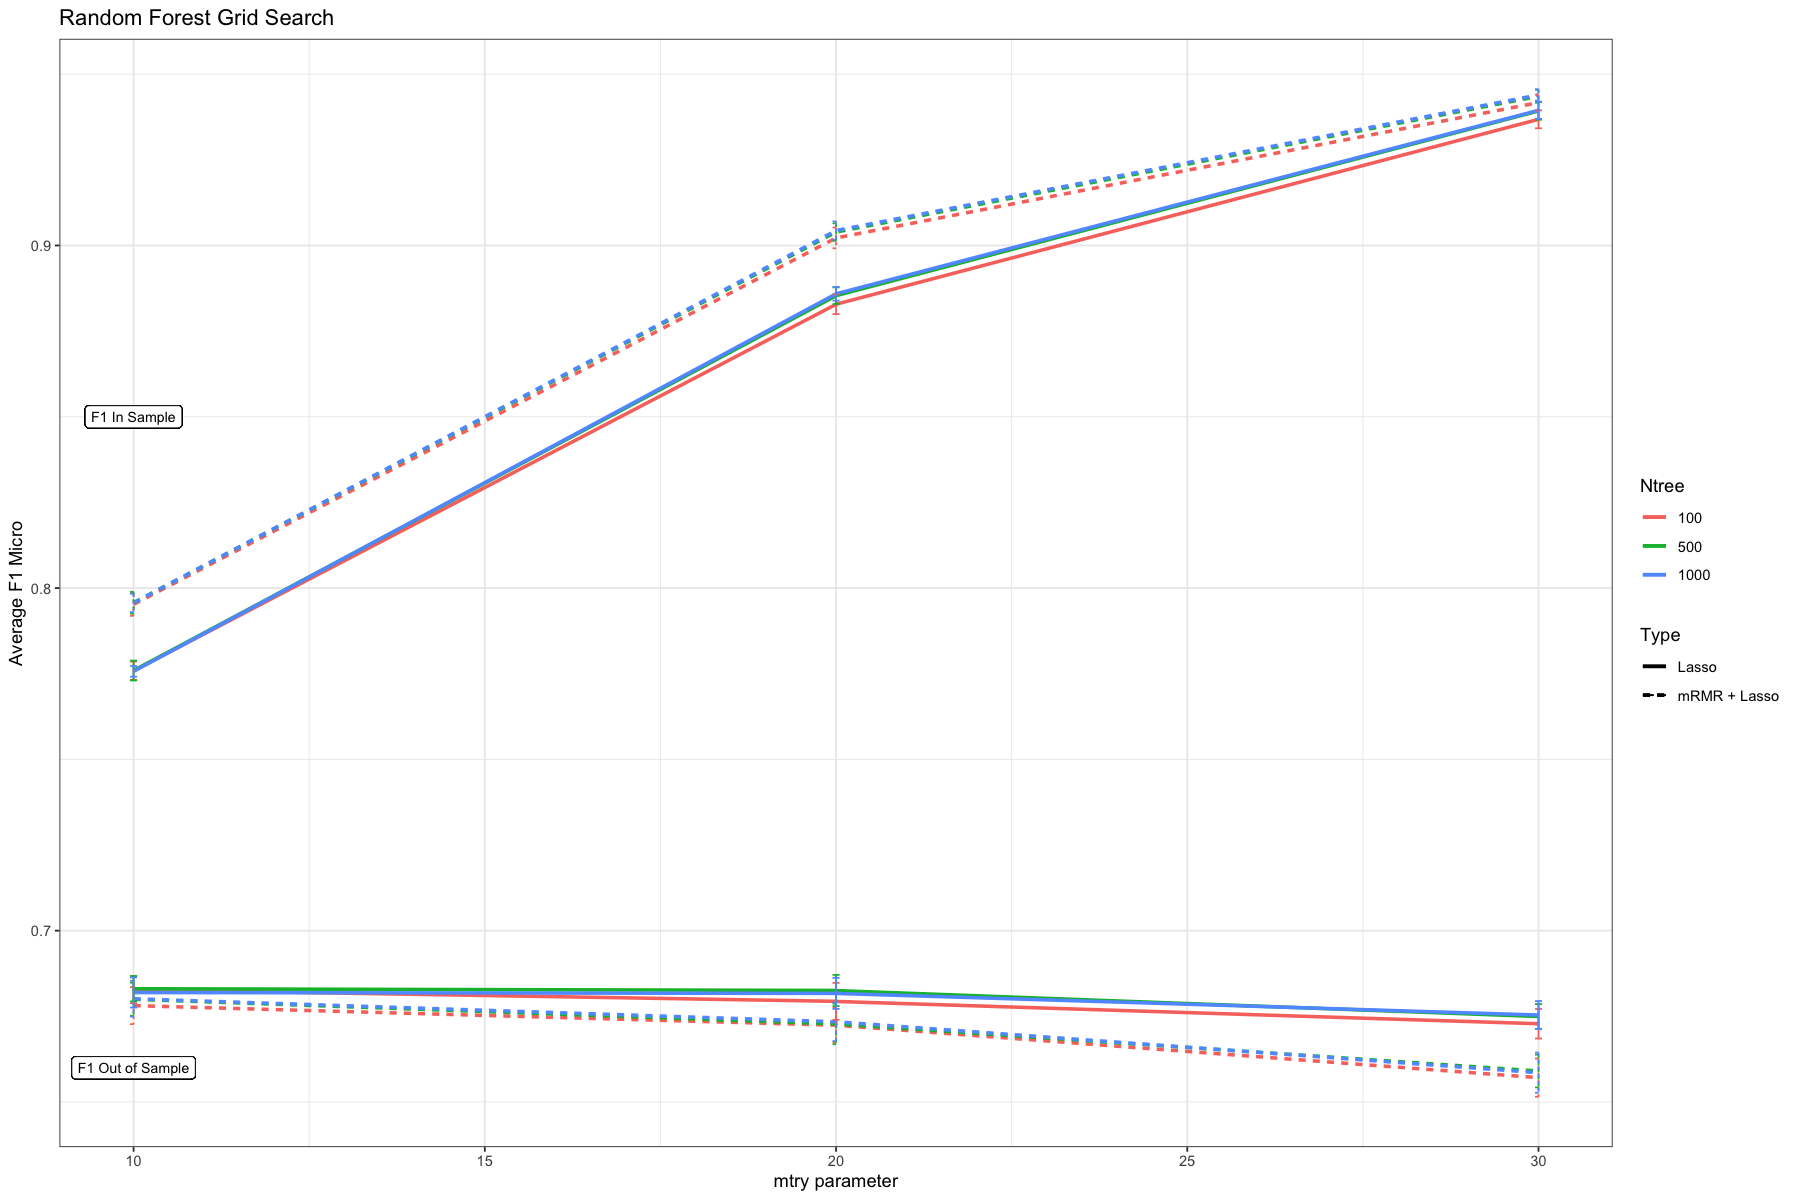

In [75]:
ggplot(res_rf, aes(x = Mtry, color = factor(Ntree), linetype = type)) +
    geom_line(aes(y = Avg_f1_IN), size = 1) +
    geom_line(aes(y = Avg_f1_OUT), size = 1) +
    geom_errorbar(aes(y = Avg_f1_IN, ymin = Avg_f1_IN - Std_f1_IN, ymax = Avg_f1_IN + Std_f1_IN), width = 0.1, size = 0.5) +
    geom_errorbar(aes(y = Avg_f1_OUT, ymin = Avg_f1_OUT - Std_f1_OUT, ymax = Avg_f1_OUT + Std_f1_OUT), width = 0.1, size = 0.5) +
    geom_label(aes(x = 10, y = 0.85, label = "F1 In Sample"), color = "black", size = 3) +
    geom_label(aes(x = 10, y = 0.66, label = "F1 Out of Sample"), color = "black", size = 3) +
    labs(x = "mtry parameter", y = "Average F1 Micro", color = "Ntree") +
    scale_color_discrete(name = "Ntree") +
    scale_linetype_discrete(name = "Type") +
    theme_bw() +
    ggtitle("Random Forest Grid Search")

We can see the model is overfitting while increasing its complexity with the number of random  variables to use. Also the number of tree in the forest doesn't seem to be very important. It could reach at best a test accuracy of 0.6828 of F1 micro with a variation of 0.003975178.

#### Support Vector Machine

In [76]:
svm_cv <- function(k, df, kernel, gamma, cost) {
    #' SVM Cross-Validation
    #'
    #' This function performs k-fold cross-validation with
    #' an SVM model and returns the F1-score for each fold.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param kernel A character string, the type of kernel to
    #' be used ('linear', 'radial', or 'polynomial')
    #' @param gamma A numeric, the kernel coefficient for
    #' 'radial' and 'polynomial' kernels
    #' @param cost A numeric, the cost parameter
    #' for the SVM model
    #' @return Returns a list with two elements, 'InSample' and
    #' 'OutSample', each containing a vector of F1-scores for each fold
    #' 
    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    f1_micros_o <- c()
    f1_micros_i <- c()
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the SVM model : kernel : {kernel}, gamma : {gamma}, cost : {cost}"))
    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        x_test <- subset(test_data, select = -c(damage_grade))
        y_test <- test_data$damage_grade
        # Take the remaining groups as a training data
        train_data <- df[-splits[[i]], ]
        x_train <- subset(train_data, select = -c(damage_grade))
        y_train <- train_data$damage_grade

        sv <- svm(
            x_train,
            as.factor(y_train),
            scale = FALSE,
            kernel = kernel,
            gamma = gamma,
            cost = cost
        )
        # In sample Evaluation
        preds <- predict(sv, x_train)
        f1_micros_i <- c(f1_micros_o, F1_Score_micro(y_train, preds))

        # Out of Sample Evaluation
        preds <- predict(sv, x_test)
        f1_micros_o <- c(f1_micros_o, F1_Score_micro(y_test, preds))
    }
    F1 <- list("InSample" = f1_micros_i, "OutSample" = f1_micros_o)
    return(F1)
}

In [77]:
grid_search_svm <- function(df, k, name = "", save_data = TRUE) {
    #' Grid Search with SVM
    #'
    #' This function performs a grid search to find the best
    #' hyperparameters for an SVM model and returns the F1-scores
    #' for each combination of hyperparameters.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param name A character string, an optional name to be included
    #' in the filename when saving the results
    #' @param save_data A logical, whether to save the results to a
    #' file or not (default is TRUE)
    #' @return Returns a data frame with the results of the grid search
    #' 
    kernels <- c("radial")
    gammas <- c(0.0001, 0.001, 0.01)
    costs <- c(1, 2^{
        9
    }, 2^{
        11
    })
    results <- data.frame(
        kernel = character(),
        gamma = numeric(),
        cost = numeric(),
        Avg_f1_IN = numeric(),
        Std_f1_IN = numeric(),
        Avg_f1_OUT = numeric(),
        Std_f1_OUT = numeric()
    )
    for (kernel in kernels) {
        for (gamma in gammas) {
            for (cost in costs) {
                f1s <- svm_cv(
                    k,
                    df,
                    kernel,
                    gamma,
                    cost
                )
                results[nrow(results) + 1, ] <- c(
                    kernel,
                    gamma,
                    cost,
                    mean(f1s$InSample),
                    sd(f1s$InSample),
                    mean(f1s$OutSample),
                    sd(f1s$OutSample)
                )
                if (save_data) {
                    print(glue("INFO - {Sys.time()} : Saving results ..."))
                    saveRDS(results, file = glue("results/SVM_{name}_{k}.rds"))
                }
            }
        }
    }
    return(results)
}

In [78]:
# This cell take a very long time to run, the following cells are presenting the results
# grid_search_svm(sub_train, 5)
# grid_search_svm(sub_train, 5, name = "LASSO")

In [79]:
results_svm <- readRDS("results/SVM_5.rds")
results_svm_lasso <- readRDS("results/SVM_LASSO_5.rds")
results_svm_lasso[, "type"] <- "Lasso"
results_svm[, "type"] <- "mRMR + Lasso"
res_svm <- rbind(results_svm, results_svm_lasso)
res_svm$gamma <- as.numeric(res_svm$gamma)
res_svm$cost <- as.numeric(res_svm$cost)
res_svm$Avg_f1_IN <- as.numeric(res_svm$Avg_f1_IN)
res_svm$Std_f1_IN <- as.numeric(res_svm$Std_f1_IN)
res_svm$Avg_f1_OUT <- as.numeric(res_svm$Avg_f1_OUT)
res_svm$Std_f1_OUT <- as.numeric(res_svm$Std_f1_OUT)
res_svm

kernel gamma cost Avg_f1_IN Std_f1_IN   Avg_f1_OUT Std_f1_OUT  type        
1  radial 1e-04    1 0.5713929 0.002895061 0.5681429  0.007822652 mRMR + Lasso
2  radial 1e-04  512 0.6596571 0.004257766 0.6595714  0.004264232 mRMR + Lasso
3  radial 1e-04 2048 0.6599000 0.004110589 0.6598286  0.004109968 mRMR + Lasso
4  radial 1e-03    1 0.6247071 0.002713393 0.6228286  0.005146229 mRMR + Lasso
5  radial 1e-03  512 0.6609357 0.004376159 0.6606571  0.004429263 mRMR + Lasso
6  radial 1e-03 2048 0.6690714 0.004509061 0.6677429  0.003738110 mRMR + Lasso
7  radial 1e-02    1 0.6595429 0.004627337 0.6591714  0.004452012 mRMR + Lasso
8  radial 1e-02  512 0.6809357 0.014117501 0.6742857  0.003717032 mRMR + Lasso
9  radial 1e-02 2048 0.6825786 0.020470617 0.6726286  0.003277318 mRMR + Lasso
10 radial 1e-04    1 0.5713929 0.002895061 0.5681429  0.007822652 Lasso       
11 radial 1e-04  512 0.6596571 0.004211985 0.6595714  0.004218521 Lasso       
12 radial 1e-04 2048 0.6600429 0.004160553 0.6598857  0.004174021 Lasso       
13 radial 1e-03    1 0.6247071 0.002713393 0.6228286  0.005146229 Lasso       
14 radial 1e-03  512 0.6627714 0.005292081 0.6616571  0.004901687 Lasso       
15 radial 1e-03 2048 0.6714500 0.005343053 0.6690286  0.004191098 Lasso       
16 radial 1e-02    1 0.6597786 0.004685001 0.6595143  0.004540745 Lasso       
17 radial 1e-02  512 0.6865500 0.019521763 0.6766286  0.004231321 Lasso       
18 radial 1e-02 2048 0.6862143 0.032978889 0.6712571  0.004004334 Lasso

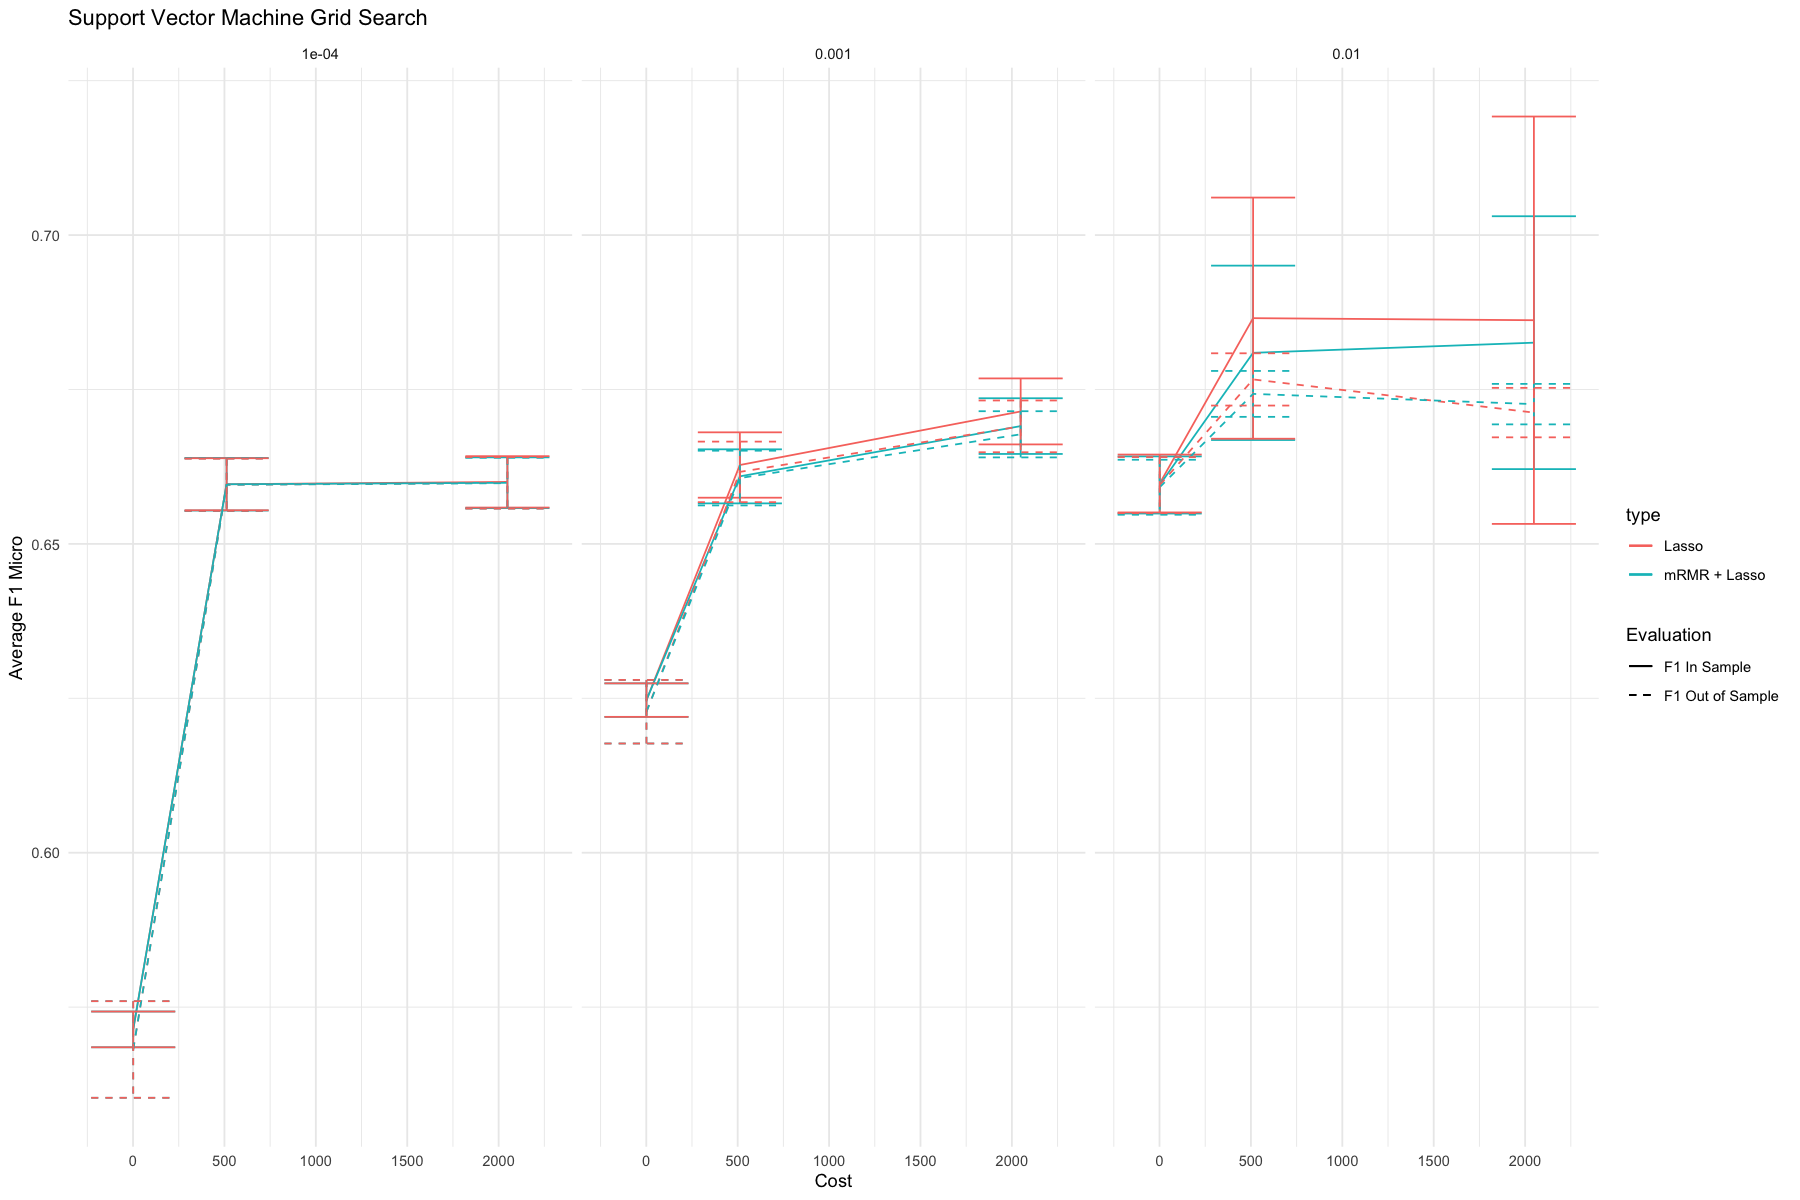

In [80]:
ggplot(res_svm, aes(x = cost, y = Avg_f1_IN, group = interaction(gamma, type), color = type)) +
    geom_line(aes(linetype = "F1 In Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_IN - Std_f1_IN, ymax = Avg_f1_IN + Std_f1_IN, linetype = "F1 In Sample")) +
    geom_line(aes(y = Avg_f1_OUT, linetype = "F1 Out of Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_OUT - Std_f1_OUT, ymax = Avg_f1_OUT + Std_f1_OUT, linetype = "F1 Out of Sample")) +
    labs(x = "Cost", y = "Average F1 Micro") +
    facet_grid(~gamma) +
    theme_minimal() +
    scale_linetype_manual(name = "Evaluation", values = c("F1 In Sample" = "solid", "F1 Out of Sample" = "dashed")) +
    ggtitle("Support Vector Machine Grid Search")

We can see that the SVM is way less overfitting than the random forest, no matter the parameter. It is achieving at best 0.6766286 of F1 micro with a standard deviation of 0.004231321.

#### Multi Layer Perceptron 

In [81]:
mlp_cv <- function(k, df, size) {
    #' MLP Cross-Validation
    #'
    #' This function performs k-fold cross-validation with an MLP
    #' model and returns the F1-score for each fold.
    #'
    #' @param k An integer, the number of folds for cross-validation
    #' @param df A data frame, the input data
    #' @param size A numeric vector, the number of neurons
    #' in the hidden layer of the MLP model
    #' @return Returns a list with two elements, 'InSample' and 'OutSample',
    #' each containing a vector of F1-scores for each fold
    #'
    find_max_colname <- function(row) {
        return(which.max(row))
    }
    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))
    
    f1_micros_o <- c()
    f1_micros_i <- c()
    
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the MLP : {size} hidden layers}"))
    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()
        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        x_test <- subset(test_data, select = -c(damage_grade))
        y_test <- test_data$damage_grade
        # Take the remaining groups as a training data
        train_data <- df[-splits[[i]], ]
        x_train <- subset(train_data, select = -c(damage_grade))
        y_train <- train_data$damage_grade

        sv <- mlp(
            x = x_train,
            y = decodeClassLabels(y_train),
            size = size,
            maxit = 250
        )
        # In Sample Evaluation
        preds <- predict(sv, x_train)
        preds <- apply(preds, MARGIN = 1, FUN = find_max_colname)
        f1_micros_i <- c(f1_micros_i, F1_Score_micro(y_train, preds))

         # Out of Sample Evaluation
        preds <- predict(sv, x_test)
        preds <- apply(preds, MARGIN = 1, FUN = find_max_colname)
        f1_micros_o <- c(f1_micros_o, F1_Score_micro(y_test, preds))
    }
    F1 <- list("InSample" = f1_micros_i, "OutSample" = f1_micros_o)
    return(F1)
}

In [82]:
grid_search_mlp <- function(df, k, name = "", save_data = TRUE) {
    #' Grid Search with MLP
    #'
    #' This function performs a grid search to find the best number of
    #' neurons for the hidden layer in an MLP model and returns
    #' the F1-scores for each number of neurons.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param name A character string, an optional name to be
    #' included in the filename when saving the results
    #' @param save_data A logical, whether to save the
    #' results to a file or not (default is TRUE)
    #' @return Returns a data frame with the results of the grid search
    #' 
    hidden_layer <- c(2, 32, 64, 128, 256)

    results <- data.frame(
        hidden_layer = character(),
        Avg_f1_IN = numeric(),
        Std_f1_IN = numeric(),
        Avg_f1_OUT = numeric(),
        Std_f1_OUT = numeric()
    )
    for (hl in hidden_layer) {
        f1s <- mlp_cv(
            k,
            df,
            hl
        )
        results[nrow(results) + 1, ] <- c(
            hl,
            mean(f1s$InSample),
            sd(f1s$InSample),
            mean(f1s$OutSample),
            sd(f1s$OutSample)
        )
        if (save_data) {
            print(glue("INFO - {Sys.time()} : Saving results ..."))
            saveRDS(results, file = glue("results/MLP_{name}_{k}.rds"))
        }
    }
    return(results)
}

In [83]:
# This cell take very long time to run, the following, the following cells are presenting the results
# grid_search_mlp(sub_train, 5)
# grid_search_mlp(sub_train, 5, name = "LASSO")

In [84]:
results_MLP <- readRDS("results/MLP_5.rds")
results_MLP_lasso <- readRDS("results/MLP_LASSO_5.rds")
results_MLP_lasso[, "type"] <- "Lasso"
results_MLP[, "type"] <- "mRMR + Lasso"
results_MLP <- rbind(results_MLP, results_MLP_lasso)
results_MLP$hidden_layer <- as.numeric(results_MLP$hidden_layer)
results_MLP

hidden_layer Avg_f1_IN Std_f1_IN   Avg_f1_OUT Std_f1_OUT  type        
1    2          0.6702786 0.002406067 0.6645143  0.001910230 mRMR + Lasso
2   32          0.7210714 0.003391635 0.6612286  0.007186012 mRMR + Lasso
3   64          0.7504714 0.003883212 0.6557143  0.005757870 mRMR + Lasso
4  128          0.7737929 0.003537644 0.6503429  0.007486450 mRMR + Lasso
5  256          0.7840500 0.003104330 0.6479714  0.006512468 mRMR + Lasso
6    2          0.6714143 0.006282446 0.6635143  0.009659826 Lasso       
7   32          0.7420571 0.002484724 0.6580857  0.006786541 Lasso       
8   64          0.7770429 0.003115486 0.6528000  0.004709521 Lasso       
9  128          0.8071643 0.003288101 0.6458857  0.003084524 Lasso       
10 256          0.8269786 0.001991148 0.6427714  0.005227088 Lasso

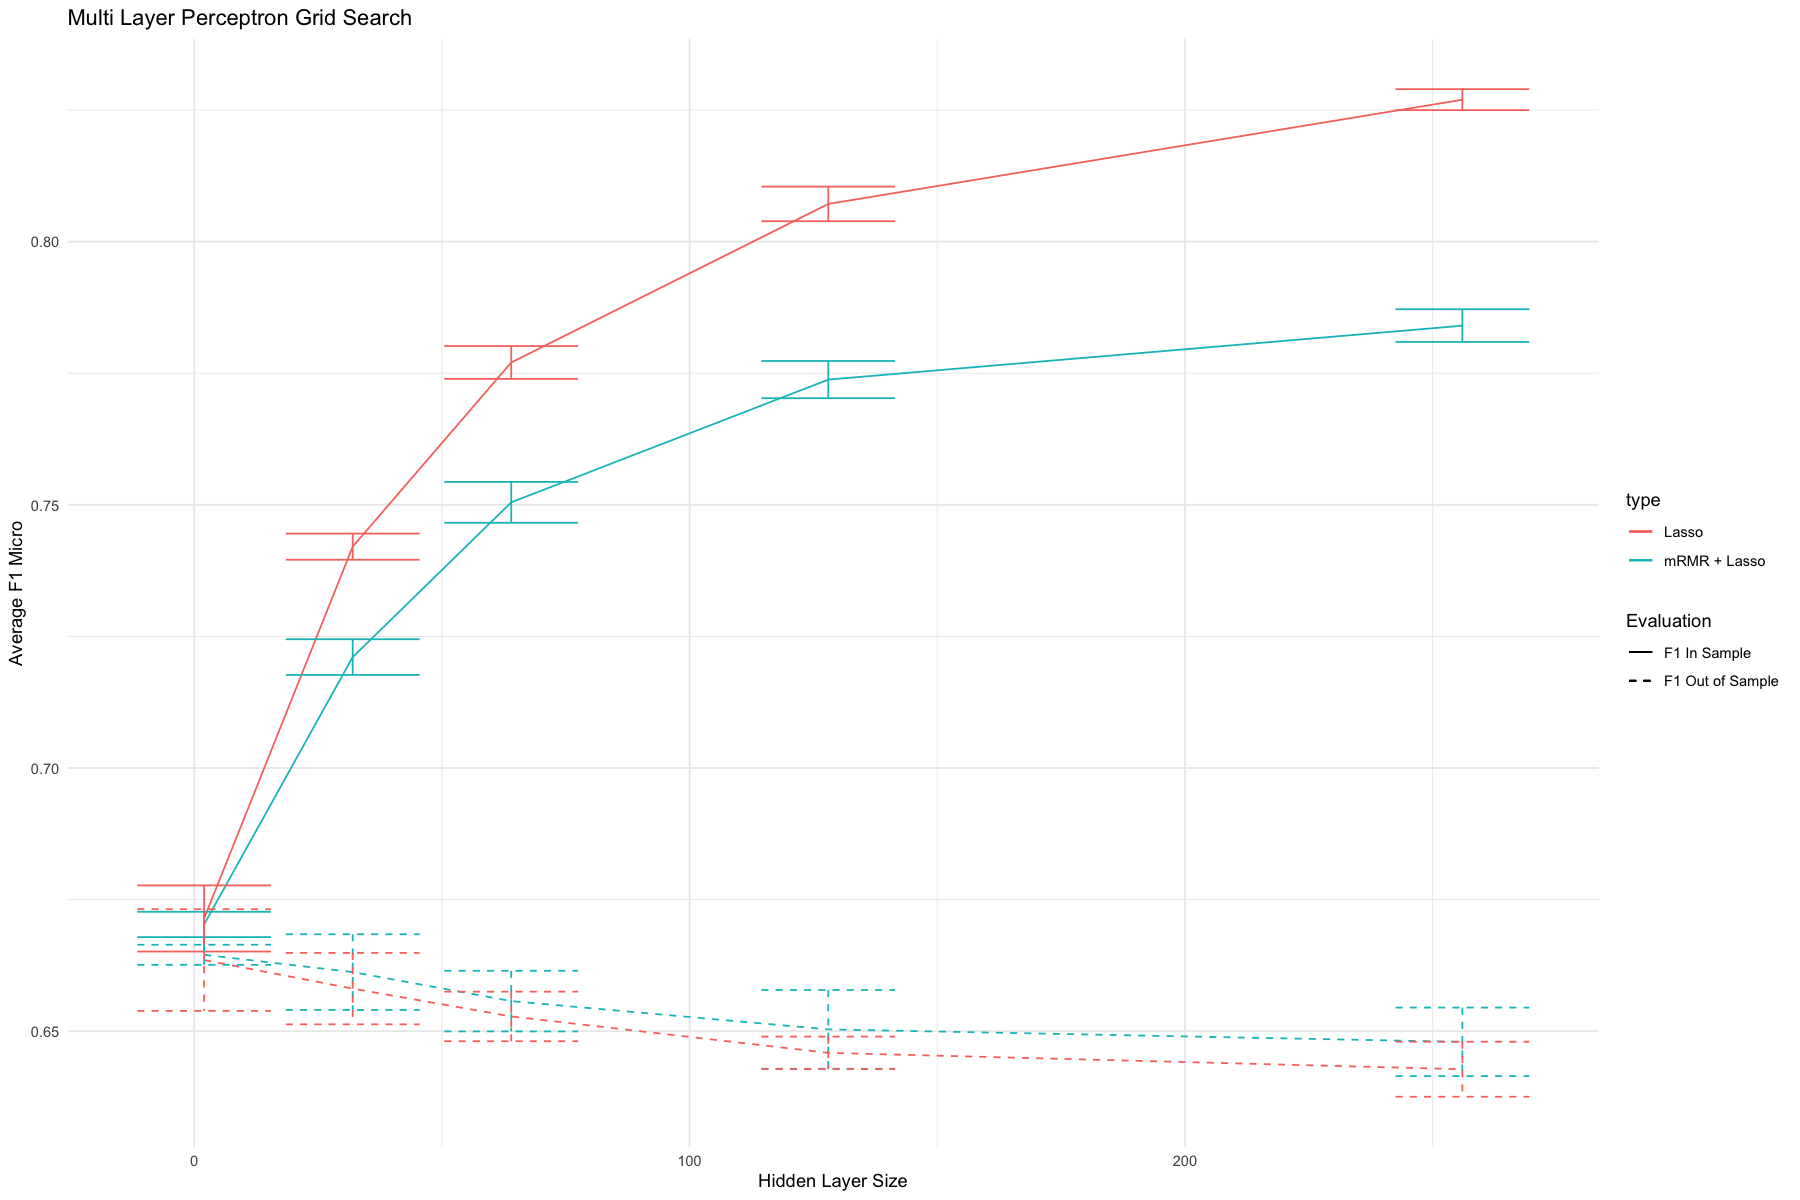

In [85]:
ggplot(results_MLP, aes(x = hidden_layer, y = Avg_f1_IN, group = interaction(type), color = type)) +
    geom_line(aes(linetype = "F1 In Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_IN - Std_f1_IN, ymax = Avg_f1_IN + Std_f1_IN, linetype = "F1 In Sample")) +
    geom_line(aes(y = Avg_f1_OUT, linetype = "F1 Out of Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_OUT - Std_f1_OUT, ymax = Avg_f1_OUT + Std_f1_OUT, linetype = "F1 Out of Sample")) +
    theme_minimal() +
    labs(x = "Hidden Layer Size", y = "Average F1 Micro") + 
    scale_linetype_manual(name = "Evaluation", values = c("F1 In Sample" = "solid", "F1 Out of Sample" = "dashed")) +
    ggtitle("Multi Layer Perceptron Grid Search")

The MLP is not performing that good, and also overfitting a lot when the size the hidden layer is growing.

To conclude, we can already see that in some cases, the mRMR + lasso is helping dealing with the overfitting for the MLP, but not for the random forest. We cannot yet really draw conclusions. However, the best models seems to be the random forest. Let us try another disrupting architecture, the XGboost.

### Additionnal Model : XGboost

The XGboost is a machine learning technique that is able build ensemble models based on trees. It is iteratively adding threes to try to correct errors made by the ensemble. The key feature is the gradient boosting which is using the gradient of the loss function to build new trees.

In [86]:
install.packages("xgboost")
library(xgboost)


The downloaded binary packages are in
	/var/folders/dz/p7gp3f295wxf90tn1dv3qkq40000gn/T//RtmpDc8M17/downloaded_packages



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [87]:
xgbm_cv <- function(df, k, nround, max_depth, gamma) {

    #' This function performs k-fold cross-validation
    #' with an XGBoost model and returns the F1-score for each fold.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param nround An integer, the number of boosting rounds
    #' @param max_depth An integer, the maximum depth of each decision tree
    #' @param gamma A numeric, the minimum loss reduction
    #' required to make a split
    #' @return Returns a list with two elements, 'InSample' and
    #' 'OutSample', each containing a vector of F1-scores for each fold
    #' 

    # To ensure the splits are all equivalents among all models
    set.seed(seed)
    # Shuffle the dataset randomly.
    sub_idx <- sample(seq_len(nrow(df)))
    max <- ceiling(nrow(df) / k)
    splits <- split(sub_idx, ceiling(seq_along(sub_idx) / max))

    df$damage_grade <- as.numeric(df$damage_grade) - 1

    f1_micros_o <- c()
    f1_micros_i <- c()
    print(glue("INFO - {Sys.time()} : Training {k}-folds cross validation using the XGBoost Model: {nround} nrounds : {max_depth} max_depth : {gamma} gamma"))
    for (i in 1:k) {
        print(glue("INFO - {Sys.time()} : Step {i}/{k}"))
        flush.console()

        # Take the group as a hold out or test data set
        test_data <- df[splits[[i]], ]
        x_test <- subset(test_data, select = -c(damage_grade))
        y_test <- test_data$damage_grade

        # Take the remaining groups as a training data
        train_data <- df[-splits[[i]], ]
        x_train <- subset(train_data, select = -c(damage_grade))
        y_train <- train_data$damage_grade

        xgb <- xgboost(
            as.matrix(x_train),
            label = y_train,
            nround = nround,
            max_depth = max_depth,
            gamma = gamma,
            verbose = 0,
            num_class = 3,
            nthread = 8
        )
        
        # In Sample Evaluation
        preds <- predict(xgb, as.matrix(x_train))
        f1_micros_i <- c(f1_micros_i, F1_Score_micro(y_train, preds))

        # Out of Sample Evaluation
        preds <- predict(xgb, as.matrix(x_test))
        f1_micros_o <- c(f1_micros_o, F1_Score_micro(y_test, preds))
    }
    F1 <- list("InSample" = f1_micros_i, "OutSample" = f1_micros_o)
    return(F1)
}

In [88]:
grid_search_xgboost <- function(df, k, name = "", save_data = TRUE) {
    #' Grid Search with XGBoost
    #'
    #' This function performs a grid search to find the best
    #' hyperparameters for an XGBoost model and returns the
    #' F1-scores for each combination of hyperparameters.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param name A character string, an optional name to
    #' be included in the filename when saving the results
    #' @param save_data A logical, whether to save the
    #' results to a file or not (default is TRUE)
    #' @return Returns a data frame with the results of the grid search
    #' 
    nrounds <- c(10, 100, 200)
    max_depths <- c(3, 6, 9)
    gammas <- c(0, 10, 30)
    
    results <- data.frame(
        nround = character(),
        max_depth = numeric(),
        gamma = numeric(),
        Avg_f1_IN = numeric(),
        Std_f1_IN = numeric(),
        Avg_f1_OUT = numeric(),
        Std_f1_OUT = numeric()
    )
    for (nround in nrounds) {
        for (max_depth in max_depths) {
            for (gamma in gammas) {
                f1s <- xgbm_cv(
                    df,
                    k = k,
                    nround = nround,
                    max_depth = max_depth,
                    gamma = gamma
                )
                results[nrow(results) + 1, ] <- c(
                    nround,
                    max_depth,
                    gamma,
                    mean(f1s$InSample),
                    sd(f1s$InSample),
                    mean(f1s$OutSample),
                    sd(f1s$OutSample)
                )
                if (save_data) {
                    print(glue("INFO - {Sys.time()} : Saving results ..."))
                    saveRDS(results, file = glue("results/XGBOOST_{name}_{k}.rds"))
                }
            }
        }
    }
    return(results)
}

In [89]:
# This cell take very long time, the following cell is presenting the results
# grid_search_xgboost(sub_train, 5)
# grid_search_xgboost(sub_train_lasso, 5, name = "LASSO")

In [90]:
results_XGBOOST <- readRDS("results/XGBOOST_5.rds")
results_XGBOOST_lasso <- readRDS("results/XGBOOST_LASSO_5.rds")
results_XGBOOST_lasso[, "type"] <- "Lasso"
results_XGBOOST[, "type"] <- "mRMR + Lasso"
results_XGBOOST <- rbind(results_XGBOOST, results_XGBOOST_lasso)
results_XGBOOST$nround <- as.numeric(results_XGBOOST$nround)
results_XGBOOST

nround max_depth gamma Avg_f1_IN Std_f1_IN    Avg_f1_OUT Std_f1_OUT 
1   10    3          0    0.6571143 0.0028342160 0.6548571  0.005253764
2   10    3         10    0.6562143 0.0023457517 0.6545143  0.004572098
3   10    3         30    0.6523714 0.0018780757 0.6516857  0.003803060
4   10    6          0    0.6860071 0.0014545407 0.6710000  0.004966212
5   10    6         10    0.6709357 0.0020390637 0.6675429  0.004931573
6   10    6         30    0.6595143 0.0028991994 0.6583714  0.005998809
7   10    9          0    0.7147643 0.0018973330 0.6730000  0.005031533
8   10    9         10    0.6751214 0.0008603363 0.6721714  0.001275355
9   10    9         30    0.6608143 0.0032986353 0.6587143  0.005861497
10 100    3          0    0.6916286 0.0005466736 0.6759143  0.002528612
11 100    3         10    0.6735929 0.0011623889 0.6699714  0.003887972
12 100    3         30    0.6588357 0.0022165311 0.6580286  0.004171575
13 100    6          0    0.7433429 0.0017897454 0.6756857  0.003530335
14 100    6         10    0.6749000 0.0009640873 0.6710286  0.002995575
15 100    6         30    0.6624429 0.0022994287 0.6610571  0.005603024
16 100    9          0    0.8099571 0.0026016821 0.6711143  0.005736919
17 100    9         10    0.6774500 0.0009595120 0.6740571  0.001379885
18 100    9         30    0.6632286 0.0027474014 0.6614000  0.005985015
19 200    3          0    0.7030143 0.0015515381 0.6769714  0.002770839
20 200    3         10    0.6735929 0.0011623889 0.6699714  0.003887972
21 200    3         30    0.6588357 0.0022165311 0.6580286  0.004171575
22 200    6          0    0.7737857 0.0025456295 0.6720857  0.005036196
23 200    6         10    0.6749000 0.0009640873 0.6710286  0.002995575
24 200    6         30    0.6624429 0.0022994287 0.6610571  0.005603024
25 200    9          0    0.8572929 0.0031132329 0.6637429  0.006810406
26 200    9         10    0.6774500 0.0009595120 0.6740571  0.001379885
27 200    9         30    0.6632286 0.0027474014 0.6614000  0.005985015
28  10    3          0    0.6566571 0.0026959673 0.6540857  0.006055525
29  10    3         10    0.6556214 0.0009301498 0.6550000  0.004588139
30  10    3         30    0.6516714 0.0018851596 0.6511143  0.003882719
31  10    6          0    0.6843071 0.0014765601 0.6700286  0.004952221
32  10    6         10    0.6707071 0.0008456823 0.6669714  0.004667954
33  10    6         30    0.6606214 0.0036272952 0.6586571  0.006207796
34  10    9          0    0.7191571 0.0032789721 0.6749143  0.002815047
35  10    9         10    0.6749286 0.0012901708 0.6718857  0.002554308
36  10    9         30    0.6627643 0.0016226632 0.6599429  0.004749436
37 100    3          0    0.6907929 0.0016036470 0.6764857  0.001692119
38 100    3         10    0.6735143 0.0009982766 0.6695143  0.005590261
39 100    3         30    0.6592429 0.0018199223 0.6583429  0.004057746
40 100    6          0    0.7451929 0.0010928221 0.6805429  0.003762598
41 100    6         10    0.6751286 0.0009249931 0.6724857  0.001983606
42 100    6         30    0.6646929 0.0018176782 0.6624571  0.005104420
43 100    9          0    0.8177143 0.0024698436 0.6743714  0.004724664
44 100    9         10    0.6774214 0.0006325564 0.6733429  0.001814342
45 100    9         30    0.6647643 0.0016018962 0.6619429  0.005542599
46 200    3          0    0.7035000 0.0012166469 0.6794000  0.001949359
47 200    3         10    0.6735143 0.0009982766 0.6695143  0.005590261
48 200    3         30    0.6592429 0.0018199223 0.6583429  0.004057746
49 200    6          0    0.7776143 0.0039124181 0.6779714  0.002460712
50 200    6         10    0.6751286 0.0009249931 0.6724857  0.001983606
51 200    6         30    0.6646929 0.0018176782 0.6624571  0.005104420
52 200    9          0    0.8646500 0.0032992153 0.6681714  0.005574541
53 200    9         10    0.6774214 0.0006325564 0.6733429  0.001814342
54 200    9         30    0.6647643 0.0016018962 0.6619429  0.005542599
   type        
1  mRMR + Lasso
2  mRMR + L

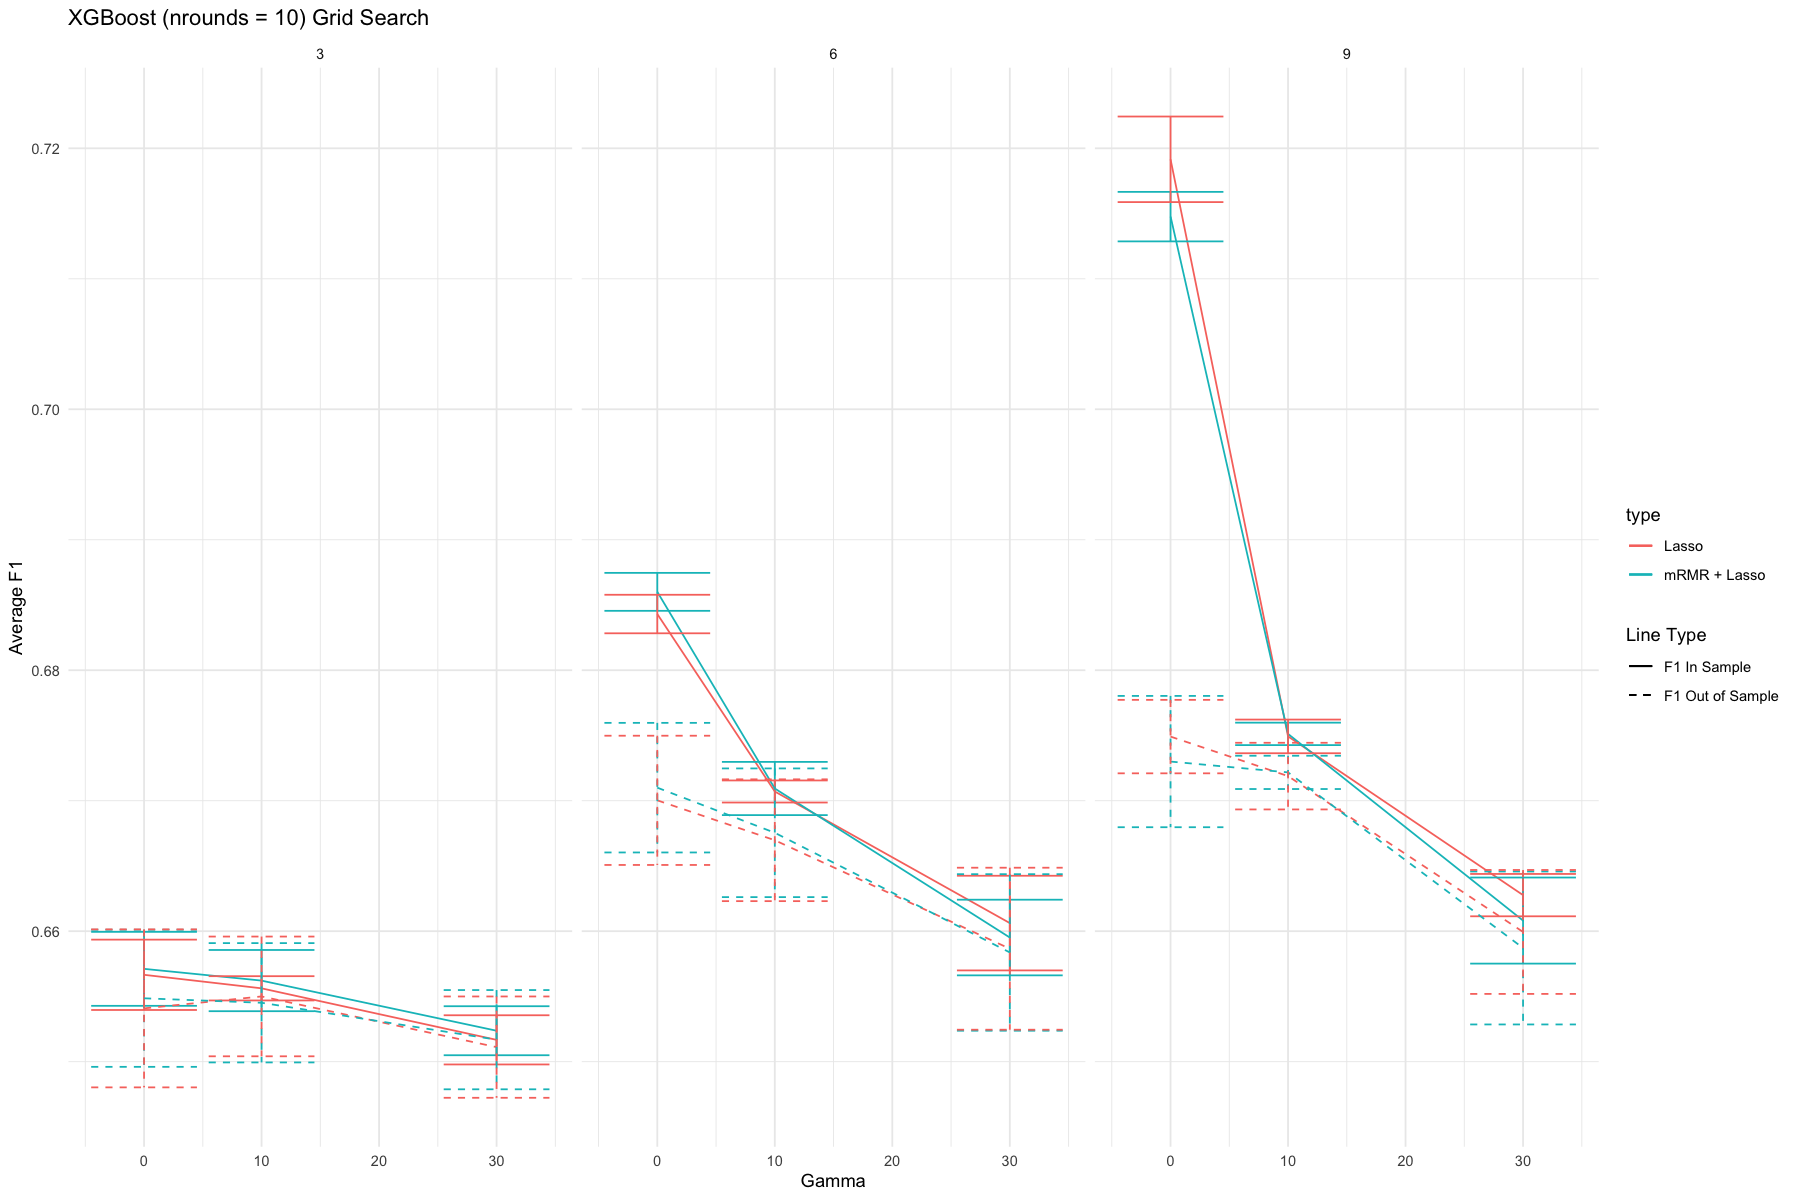

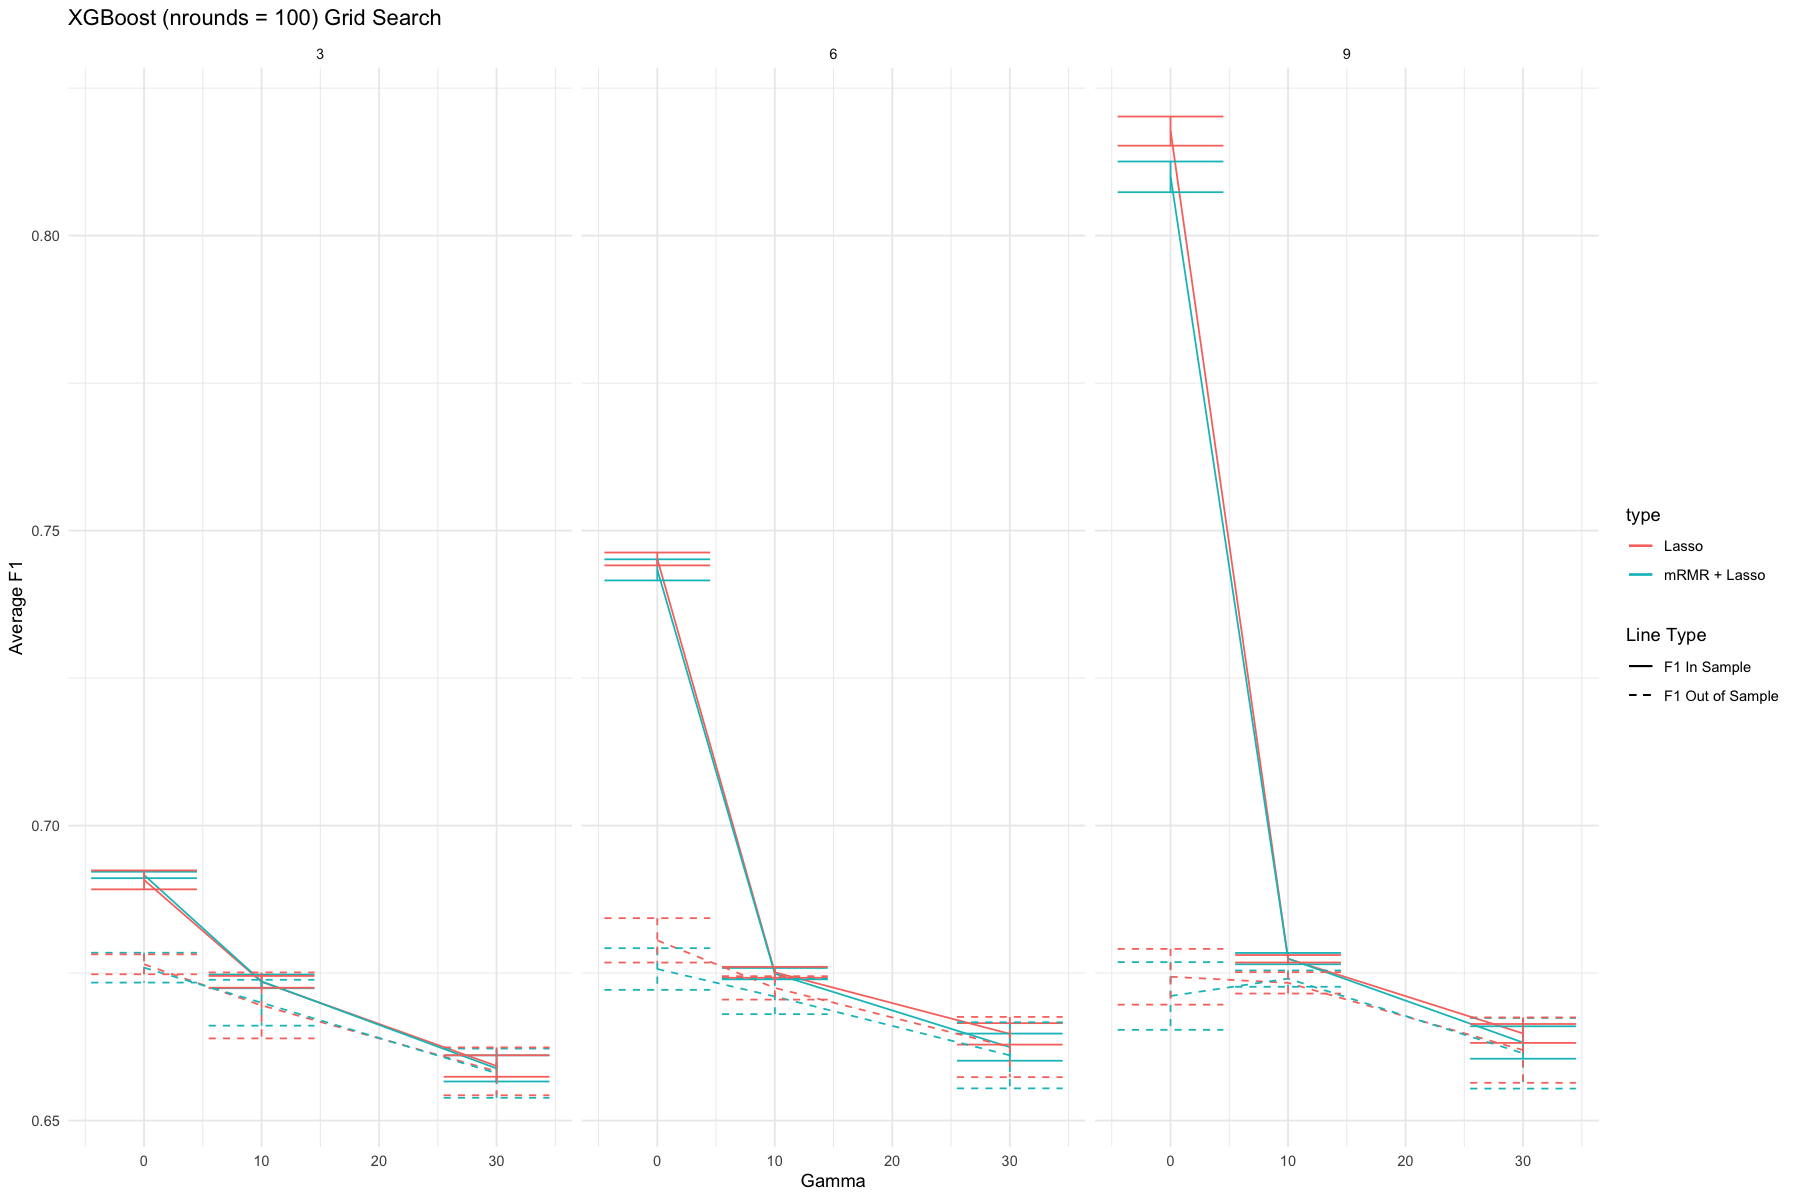

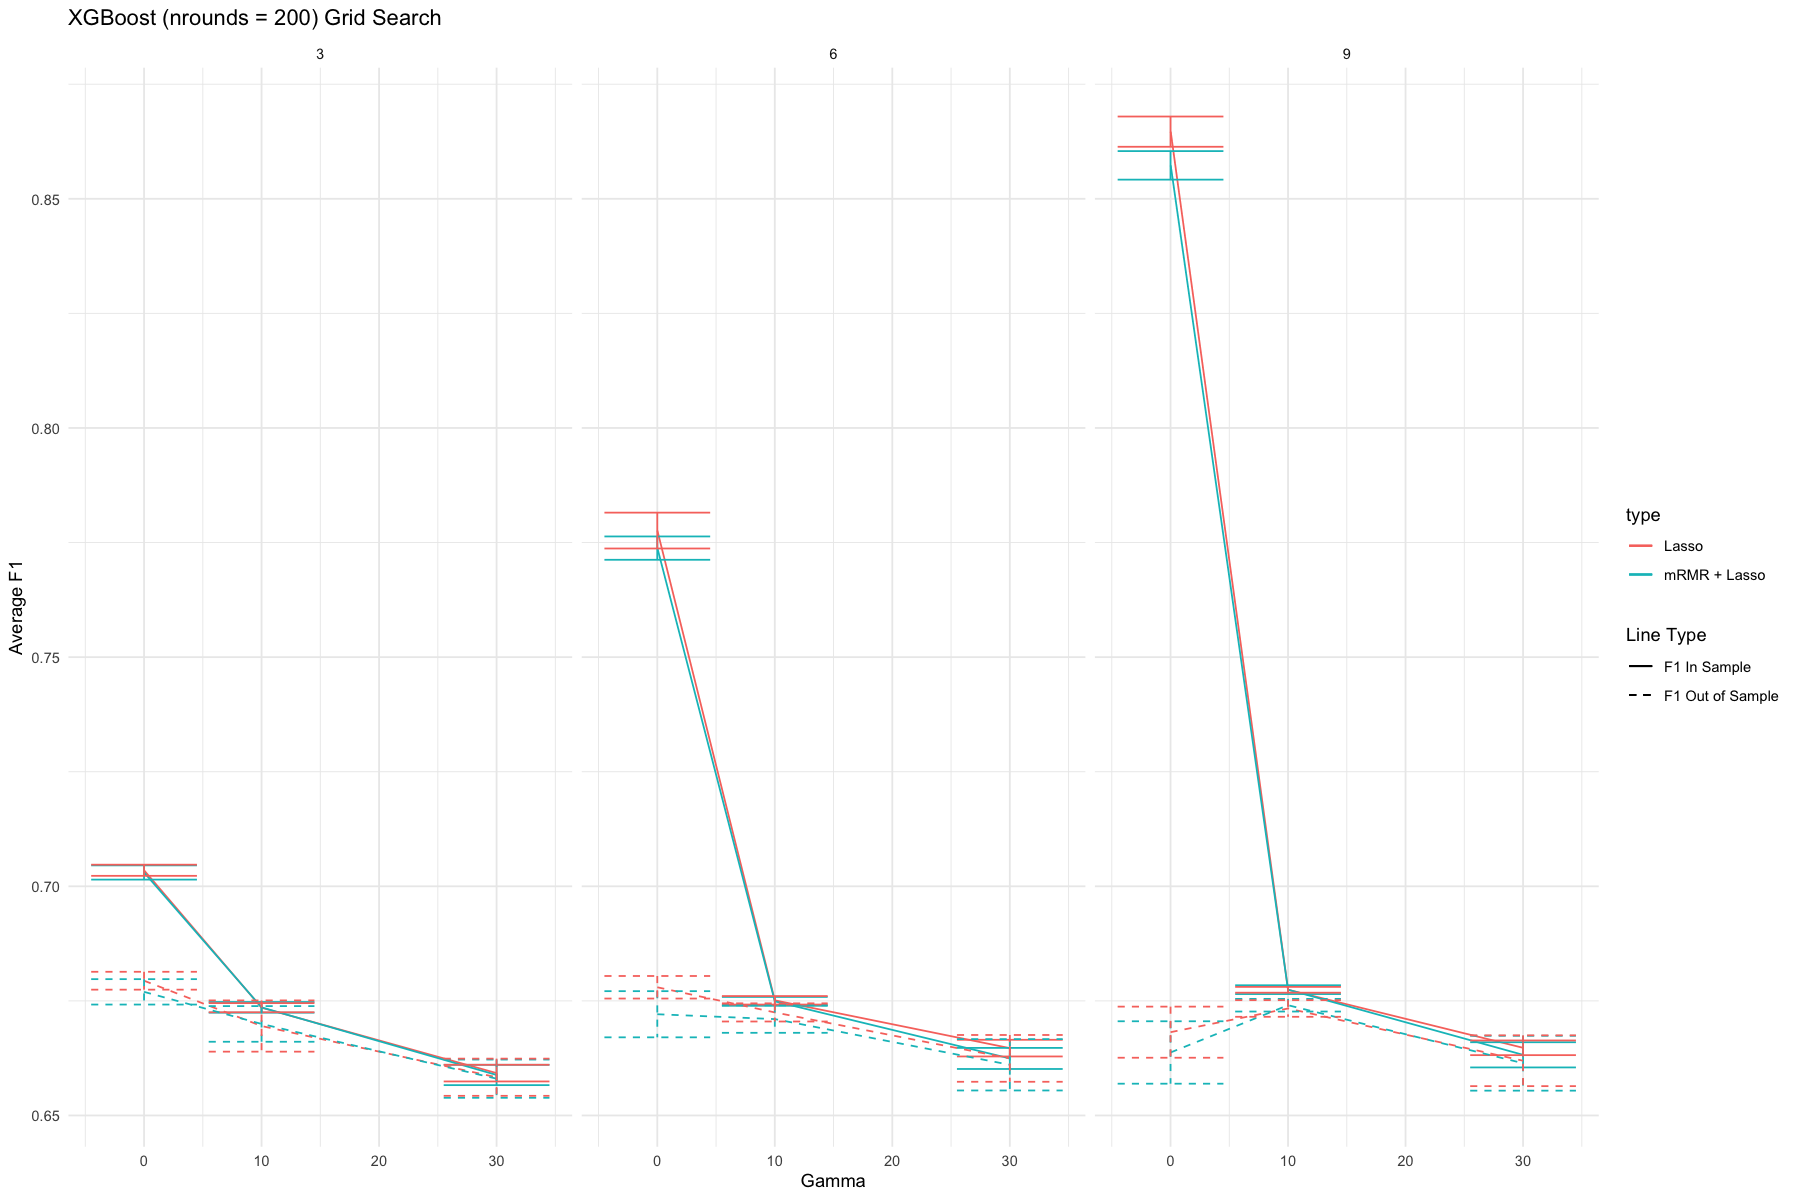

In [91]:
for (rr in unique(results_XGBOOST$nround)) {
   rounds <- results_XGBOOST[results_XGBOOST$nround == rr, ]
   print(ggplot(rounds, aes(x = gamma, y = Avg_f1_IN, group = interaction(max_depth, type), color = type)) +
       geom_line(aes(linetype = "F1 In Sample")) +
       geom_errorbar(aes(ymin = Avg_f1_IN - Std_f1_IN, ymax = Avg_f1_IN + Std_f1_IN, linetype = "F1 In Sample")) +
       geom_line(aes(y = Avg_f1_OUT, linetype = "F1 Out of Sample")) +
       geom_errorbar(aes(ymin = Avg_f1_OUT - Std_f1_OUT, ymax = Avg_f1_OUT + Std_f1_OUT, linetype = "F1 Out of Sample")) +
       labs(x = "Gamma", y = "Average F1") +
       facet_grid(~max_depth) +
       theme_minimal() +
       scale_linetype_manual(name = "Line Type", values = c("F1 In Sample" = "solid", "F1 Out of Sample" = "dashed")) +
       ggtitle(glue("XGBoost (nrounds = {rr}) Grid Search")))
} 

The XGboost is having a similar performance to the previous models, but with less variance in the results. Furthermore, thanks to parallelisation, it is way faster for training. These are the reason why we are choosing this model and we will fine tune it on the whole dataset.

#### Fine tuning at large  scale

For evaluating the XGboost at large scale, we decided to keep only a gamma of 5 as in the previous section it shown the best performances. In fact, between 10 and 30 the performance is dropping, so we decided to reduce it a little bit. And we will assess the effect of the number of rounds and the depths of the trees, with larger values. The following cell is showing our grid search. However, we stopped during the 400 in the number of rounds as the results were not conclusive. Furthermore, we are awarre the training the model on the dataset with lasso only provided slightly better results than lasso + mRMR.

In [92]:
grid_search_xgboost_large <- function(df, k, name = "", save_data = TRUE) {
    #' Grid Search with XGBoost
    #'
    #' This function performs a grid search to find the best
    #' hyperparameters for an XGBoost model and returns the
    #' F1-scores for each combination of hyperparameters.
    #'
    #' @param df A data frame, the input data
    #' @param k An integer, the number of folds for cross-validation
    #' @param name A character string, an optional name to
    #' be included in the filename when saving the results
    #' @param save_data A logical, whether to save the
    #' results to a file or not (default is TRUE)
    #' @return Returns a data frame with the results of the grid search
    #'
    nrounds <- c(200, 400)
    max_depths <- c(10, 20, 30, 50)
    gammas <- c(5)

    results <- data.frame(
        nround = character(),
        max_depth = numeric(),
        gamma = numeric(),
        Avg_f1_IN = numeric(),
        Std_f1_IN = numeric(),
        Avg_f1_OUT = numeric(),
        Std_f1_OUT = numeric()
    )
    for (nround in nrounds) {
        for (max_depth in max_depths) {
            for (gamma in gammas) {
                f1s <- xgbm_cv(
                    df,
                    k = k,
                    nround = nround,
                    max_depth = max_depth,
                    gamma = gamma
                )
                results[nrow(results) + 1, ] <- c(
                    nround,
                    max_depth,
                    gamma,
                    mean(f1s$InSample),
                    sd(f1s$InSample),
                    mean(f1s$OutSample),
                    sd(f1s$OutSample)
                )
                if (save_data) {
                    print(glue("INFO - {Sys.time()} : Saving results ..."))
                    saveRDS(results, file = glue("results/XGBOOST_{name}_{k}.rds"))
                }
            }
        }
    }
    return(results)
}

In [93]:
# This cell takes a very long time to run, the following cells are presenting the results
# grid_search_xgboost_large(train, 5, name = "mRMR_LASSO")

`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?


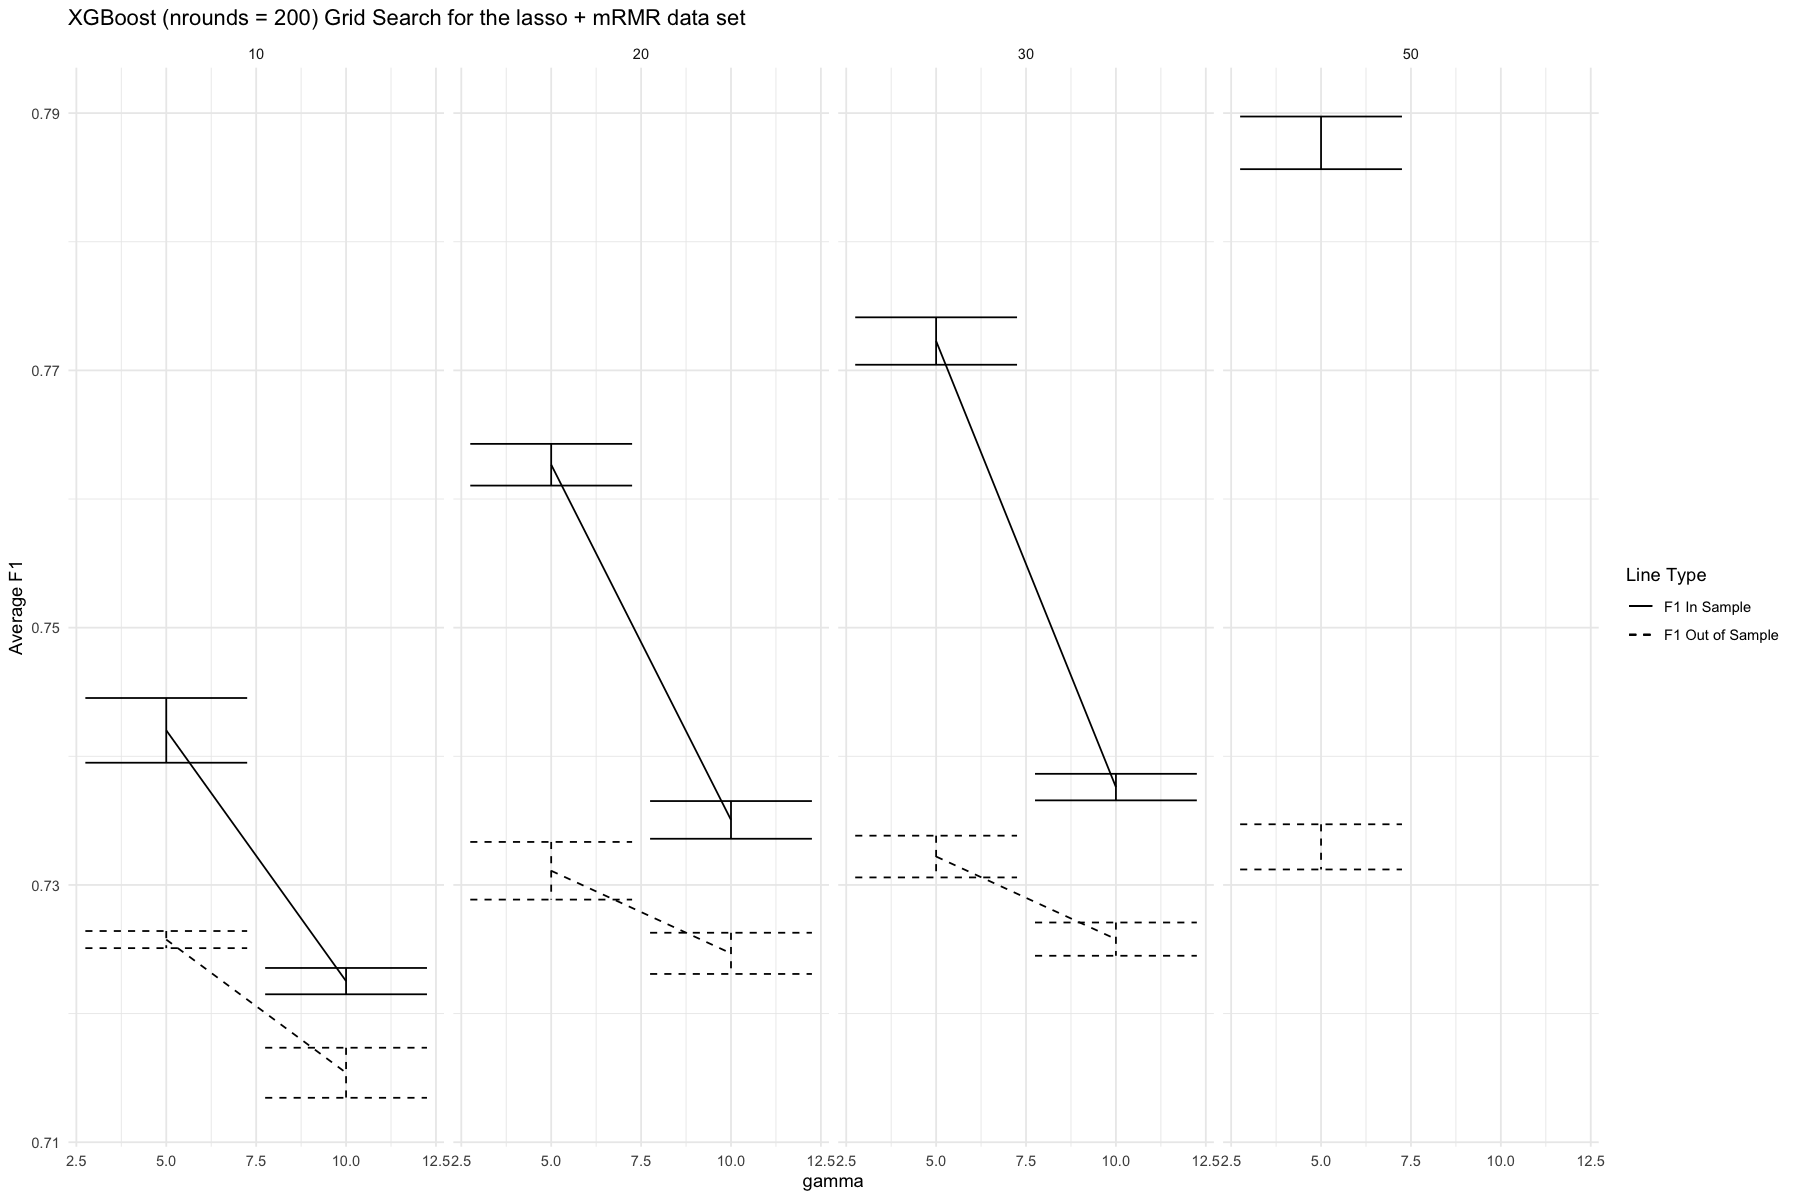

In [94]:
results_XGBOOST_latest <- readRDS("results/XGBOOST__5_mRMR_lasso.rds")
results_XGBOOST_latest[, "type"] <- "mRMR + Lasso"
rounds_200 <- results_XGBOOST_latest
ggplot(rounds_200, aes(x = gamma, y = Avg_f1_IN)) +
    geom_line(aes(linetype = "F1 In Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_IN - Std_f1_IN, ymax = Avg_f1_IN + Std_f1_IN, linetype = "F1 In Sample")) +
    geom_line(aes(y = Avg_f1_OUT, linetype = "F1 Out of Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_OUT - Std_f1_OUT, ymax = Avg_f1_OUT + Std_f1_OUT, linetype = "F1 Out of Sample")) +
    labs(x = "gamma", y = "Average F1") +
    facet_grid(~max_depth) +
    theme_minimal() +
    scale_linetype_manual(name = "Line Type", values = c("F1 In Sample" = "solid", "F1 Out of Sample" = "dashed")) +
    ggtitle("XGBoost (nrounds = 200) Grid Search for the lasso + mRMR data set")

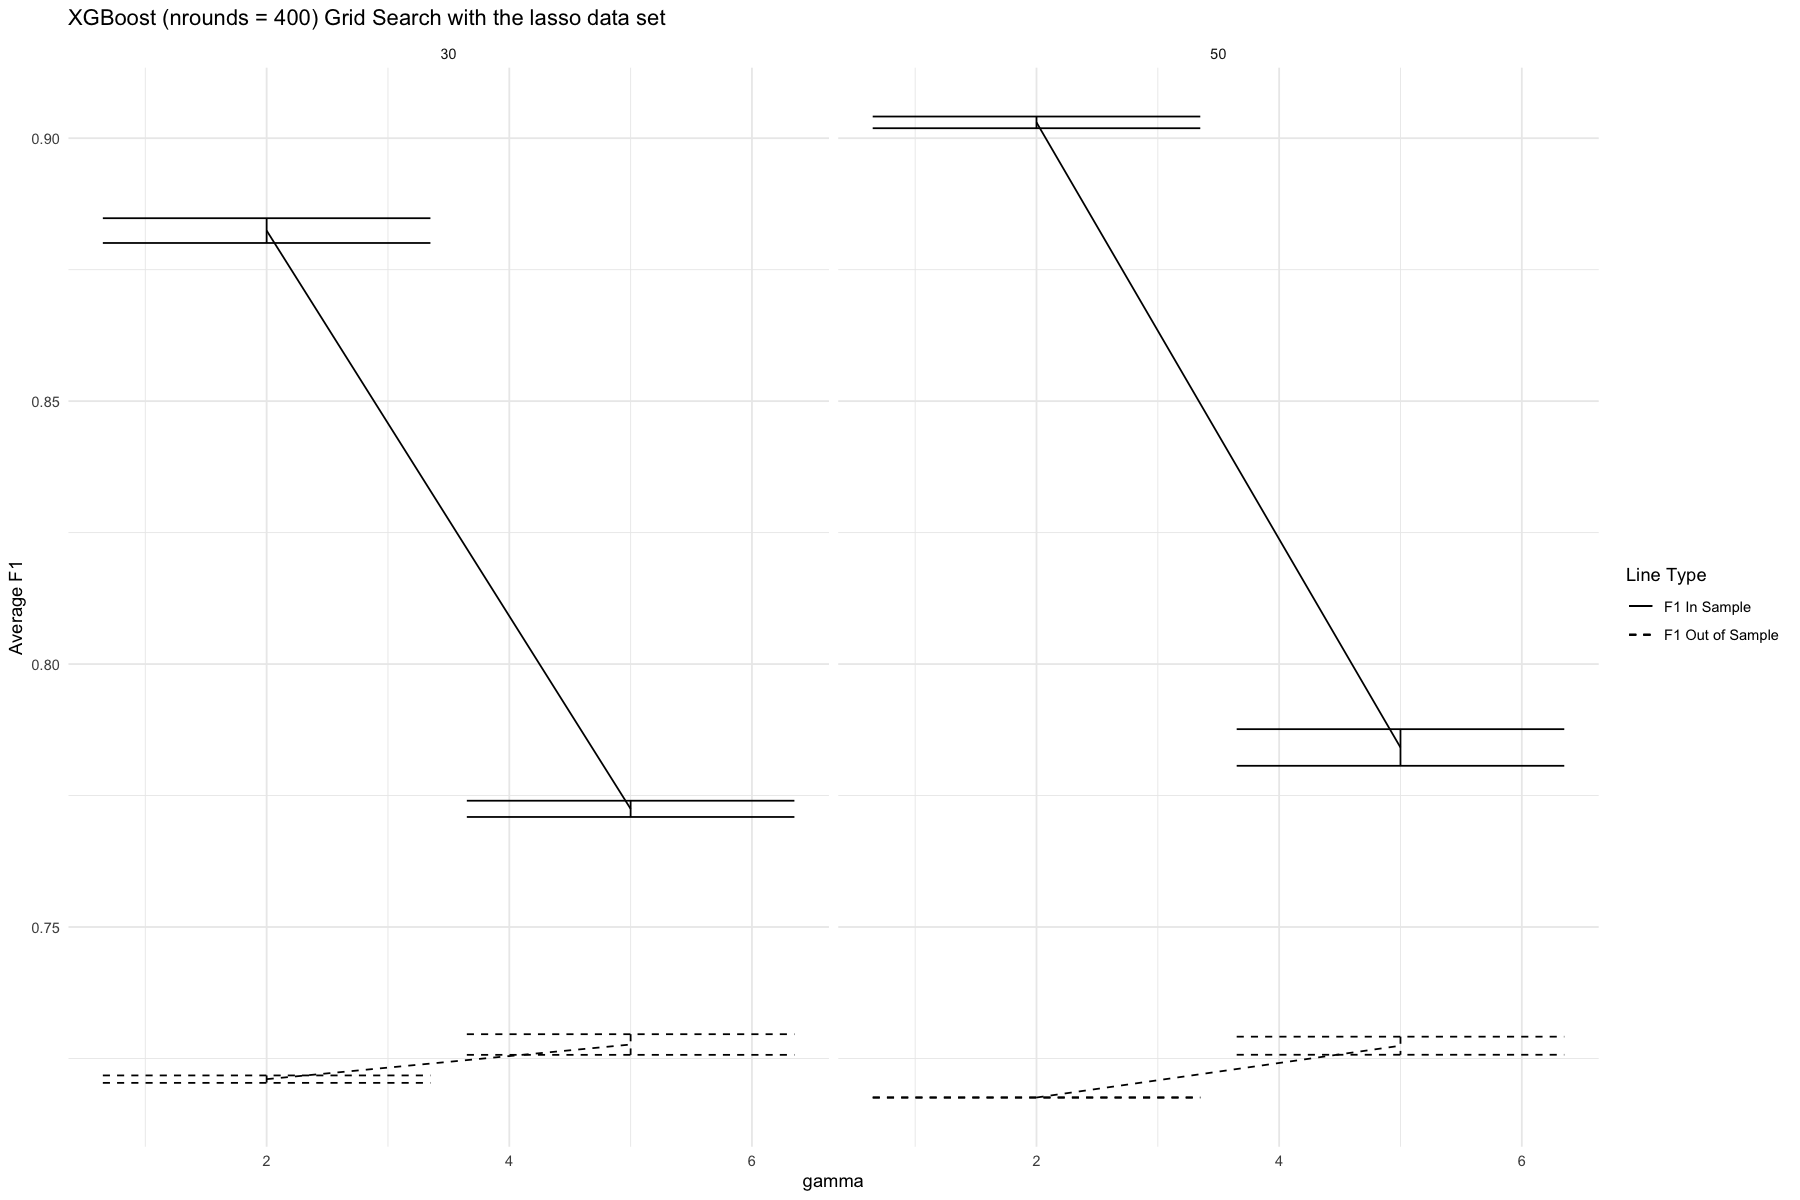

In [95]:
results_XGBOOST_latest_lasso <- readRDS("results/XGBOOST_FULLLASSO_2.rds")
results_XGBOOST_latest_lasso[, "type"] <- "Lasso"
rounds_400 <- results_XGBOOST_latest_lasso
ggplot(rounds_400, aes(x = gamma, y = Avg_f1_IN)) +
    geom_line(aes(linetype = "F1 In Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_IN - Std_f1_IN, ymax = Avg_f1_IN + Std_f1_IN, linetype = "F1 In Sample")) +
    geom_line(aes(y = Avg_f1_OUT, linetype = "F1 Out of Sample")) +
    geom_errorbar(aes(ymin = Avg_f1_OUT - Std_f1_OUT, ymax = Avg_f1_OUT + Std_f1_OUT, linetype = "F1 Out of Sample")) +
    labs(x = "gamma", y = "Average F1") +
    facet_grid(~max_depth) +
    theme_minimal() +
    scale_linetype_manual(name = "Line Type", values = c("F1 In Sample" = "solid", "F1 Out of Sample" = "dashed")) +
    ggtitle("XGBoost (nrounds = 400) Grid Search with the lasso data set")

As shown above several conclusions can be drown:
- We can also see that the less restrictive lasso dataset is providing slightly better results than the lasso + mRMR.
- The number of round of 400 is performing less good than 200 and takes more time to train too. As such, we will decide to keep the 200.
- For the gamma, the value of 5 is better than 10, even though it is overfitting slighlty more. Also we tried a value at 2 (the chart just above) but 5 is still the best value.
- For the max depth, we can clearly see that rising the max depth allows the model to better understand the underlying patterns.
  
To sum up, according to our heuristics, we will be evaluating an XGboost model with 200 rounds, a gamma of 5 and a max depth of 100 as these set of parameters are providing best results.

### Model Application

After deciding which model to use, we decide to try one last train-test split to evaluate the model. The following cells are training and evaluating the model. Finally, the best dataset is the lasso only. However it is worth to keep in mind that it is much longer to train for a small improvements, in this case, one may not be interested for this compromise. This observation was deduced by trying both models and comparing the results.

In [96]:
xgboostds <- train_lasso
print(glue("INFO - {Sys.time()} : Preparing the data..."))
xgboostds$damage_grade <- as.numeric(xgboostds$damage_grade) - 1

# To ensure the splits are all equivalents among all models
set.seed(seed)
# Shuffle the dataset randomly.
train_size <- round(.8 * nrow(xgboostds))
sub_idx <- sample(seq_len(nrow(xgboostds)), train_size, replace = FALSE)

train_data <- xgboostds[sub_idx, ]
test_data <- xgboostds[-sub_idx, ]
x_train <- subset(train_data, select = -c(damage_grade))
y_train <- train_data$damage_grade
x_test <- subset(test_data, select = -c(damage_grade))

xgboost_final_test <- function(x_train, y_train, name = "mod") {
    print(glue("INFO - {Sys.time()} : Training the model"))
    mod <- xgboost(
        as.matrix(x_train),
        label = y_train,
        nround = 200,
        max_depth = 100,
        gamma = 5,
        verbose = 0,
        num_class = 3,
        nthread = 8
    )
    print(glue("INFO - {Sys.time()} : Saving the model..."))
    saveRDS(mod, file = "results/{name}.rds")
    return(mod)
}
# This cell take a very long time to run, the following cell
# xgboost_final_test(x_train, y_train)

INFO - 2023-05-19 13:00:25.928766 : Preparing the data...


In [97]:
evaluate <- FALSE
if (evaluate) {
    # Loading the saved model, and evaluating one final time before the submission
    final_model <- readRDS("results/mod.rds")
    preds <- predict(final_model, as.matrix(x_test))
    F1_Score_micro(test_data$damage_grade, preds)
    saveRDS(confusionMatrix(test_data$damage_grade, preds), "results/confusionMatrix.rds")
}

Since the model cannot be pushed as they are too large, the value predicted for the previous cell for the F1 micro is : 0.742114351496546

In [98]:
readRDS("results/confusionMatrix.rds")

       predictions
targets     0     1     2
      0  2544  2292    72
      1  1185 24919  3531
      2   111  6250 11216

We can see that these set of parameters are the best so far, it is reaching 0.7421 on the F1 micro, which is not that far from the first place in the leaderboard. While looking on the confusion matrix, we can see that the model have hard times predicting the label 1 and the 3 as these where underepresented, especially the 1. The following cell is training the model on the whole data and saving it to make a submission on DrivenData.

In [99]:
xgboost_final <- function(df, name = "") {
   print(glue("INFO - {Sys.time()} : Preparing the data..."))
   df$damage_grade <- as.numeric(df$damage_grade) - 1

   # To ensure reproducability
   set.seed(seed)
   x_train <- subset(df, select = -c(damage_grade))
   y_train <- copy$damage_grade

   print(glue("INFO - {Sys.time()} : Training the model"))
   mod <- xgboost(
       as.matrix(x_train),
       label = y_train,
       nround = 200,
       max_depth = 100,
       gamma = 5,
       verbose = 0,
       num_class = 3,
       nthread = 8
   )

   print(glue("INFO - {Sys.time()} : Saving the model..."))
   saveRDS(mod, file = "results/{name}.rds")
}

# This function take a long time to run, the model is saved,
# however it cannot be pushed as it is too large.
# In case you are interested, please contact us.
#xgboost_final(train_lasso, name = "mod_no_val")

#### Submission Pipeline

In [100]:
# Predicting and making the submission. The +1 is very important
# as xgboost is trained on 0, 1, 2.
# The model file have not been pushed as it is too large
make_pred <- FALSE
if (make_pred) {
    # Loading the saved model
    best_mod <- readRDS("results/mod_no_val.rds")
    # Loading the data and going through the preprocessing
    test_values <- read.csv("data/test_values.csv", stringsAsFactors = TRUE)
    cols <- readRDS("results/col_lasso_only.rds")
    test_eval <- first_preprocessing_training(test_values)[cols]
    driven_data_results <- predict(best_mod, as.matrix(test_eval))
    submitable <- cbind(test_values[, "building_id"], driven_data_results + 1)
    colnames(submitable) <- c("building_id", "damage_grade")
    write.csv(submitable, "submissions/submission_2.csv", row.names = FALSE)
}

With this model, we were able to achieve 0.7426 of F1 Micro for the competition which is not far from the first on the leaderboard with 0.7558.

## Feature Relevance

For the last part of the project, it is asked to compute the relevance of a feature 
Computing the feature relevance for the feature i according to
\begin{equation*}
R_i = H(y|X^{-i}) - H(y|X)
\end{equation*}

where the $H(y|X)$ is the entropy of a multi class random variable given by :
\begin{equation*}
H(y|X) = \dfrac{1}{N}\sum_{i=1}^{N} \sum_{j=1}^{M}p(y_{ij}|x_{i}) \times log_2(p(y_{ij}|x_{i}))
\end{equation*}

In [101]:
# this cell takes a very long time, we stored the results
compute_relevance <- FALSE

if (compute_relevance) {
   # To ensure the splits are all equivalents among all models
    set.seed(seed)
    df <- train_lasso

    # Shuffle the dataset randomly and generating train test split
    train_size <- round(.7 * nrow(df))
    sub_idx <- sample(seq_len(nrow(df)), train_size, replace = FALSE)
    df$damage_grade <- as.numeric(df$damage_grade) - 1
    train_data <- df[sub_idx, ]
    test_data <- df[-sub_idx, ]
    x_train <- subset(train_data, select = -c(damage_grade))
    x_test <- subset(test_data, select = -c(damage_grade))

    # Training the model
    print(glue("INFO - {Sys.time()} : Evaluating H(y|X)"))
    xgb <- xgboost(
        as.matrix(x_train),
        label = train_data$damage_grade,
        nround = 200,
        max_depth = 100,
        gamma = 5,
        verbose = 0,
        num_class = 3,
        nthread = 8,
        objective = "multi:softprob"
    )

    # Obtaining the y\X
    preds_out <- matrix(predict(xgb, as.matrix(x_test), type = "prob"), ncol = 3, byrow = TRUE)

    get_entropy <- function(rec) {
        #' Calculate the entropy of a given record.
        #'
        #' Entropy is a measure of the uncertainty
        #'  in a set of data.
        #' This function assumes the record is a 
        #' ector or list containing three elements.
        #'
        #' @param rec The record for which entropy is calculated.
        #'
        #' @return The entropy value calculated based on the record.
        hi <- rec[[1]] * log(rec[[1]], 2) +
            rec[[2]] * log(rec[[2]], 2) +
            rec[[3]] * log(rec[[3]], 2)
        return(hi)
    }

    # Some probabilities are 0, so we just replace them with a tiny epsilon
    epsilon <- 1e-10
    preds_out[preds_out == 0] <- epsilon
    # Computing the entropy of the model
    entropy_per_obs <- apply(preds_out, MARGIN = 1, FUN = get_entropy)
    entropy_model <- -sum(entropy_per_obs) / length(entropy_per_obs)
    print(glue("INFO - {Sys.time()} : Found {entropy_model} for H(y|X)"))
    print(glue("INFO - {Sys.time()} : Moving to the features ..."))

    # Creating a dataframe to store the relevance scores
    relevances <- data.frame(
        "feature" = character(),
        "relevance" = numeric()
    )
    # Going through every feature, and removing it from the dataset.
    i <- 0
    cols <- colnames(subset(df, select = -c(damage_grade)))
    for (col in cols) {
        print(glue("INFO - {Sys.time()} : Evaluating column {i+1}/{length(cols)}"))
        flush.console()
        temp_train <- train_data[, colnames(train_data)[colnames(train_data) != col]]
        temp_test <- test_data[, colnames(test_data)[colnames(test_data) != col]]
        temp_x_train <- subset(temp_train, select = -c(damage_grade))
        temp_x_test <- subset(temp_test, select = -c(damage_grade))

        # Training the model without the feature
        xgb <- xgboost(
            as.matrix(temp_x_train),
            label = temp_train$damage_grade,
            nround = 200,
            max_depth = 100,
            gamma = 5,
            verbose = 0,
            num_class = 3,
            nthread = 8,
            objective = "multi:softprob"
        )

        # Obtaining y|X-i
        preds_out <- matrix(predict(xgb, as.matrix(temp_x_test), type = "prob"), ncol = 3, byrow = TRUE)

        # Computing the entropy
        epsilon <- 1e-10
        preds_out[preds_out == 0] <- epsilon
        entropy_per_obs_without_feat <- apply(preds_out,
            MARGIN = 1, FUN = get_entropy)
        entropy_model_without_feat <- - sum(entropy_per_obs_without_feat) /
            length(entropy_per_obs_without_feat)
        # Obtaining the relevance
        relevance <- entropy_model_without_feat - entropy_model
        # storing the results
        relevances[nrow(relevances) + 1, ] <- c(
            col,
            relevance
        )
        i <- i + 1
        print(glue("INFO - {Sys.time()} : saving ..."))
        saveRDS(relevances, file = "results/features_relevances_back_up.rds")
    }
    print(glue("INFO - {Sys.time()} : Exporting results"))
    relevances_ordered <- relevances[order(-as.numeric(relevances$relevance)), ]
    saveRDS(relevances_ordered, file = "results/features_relevances.rds")
}


Obtaining the relevances is very long, so we saved the results for analysis.

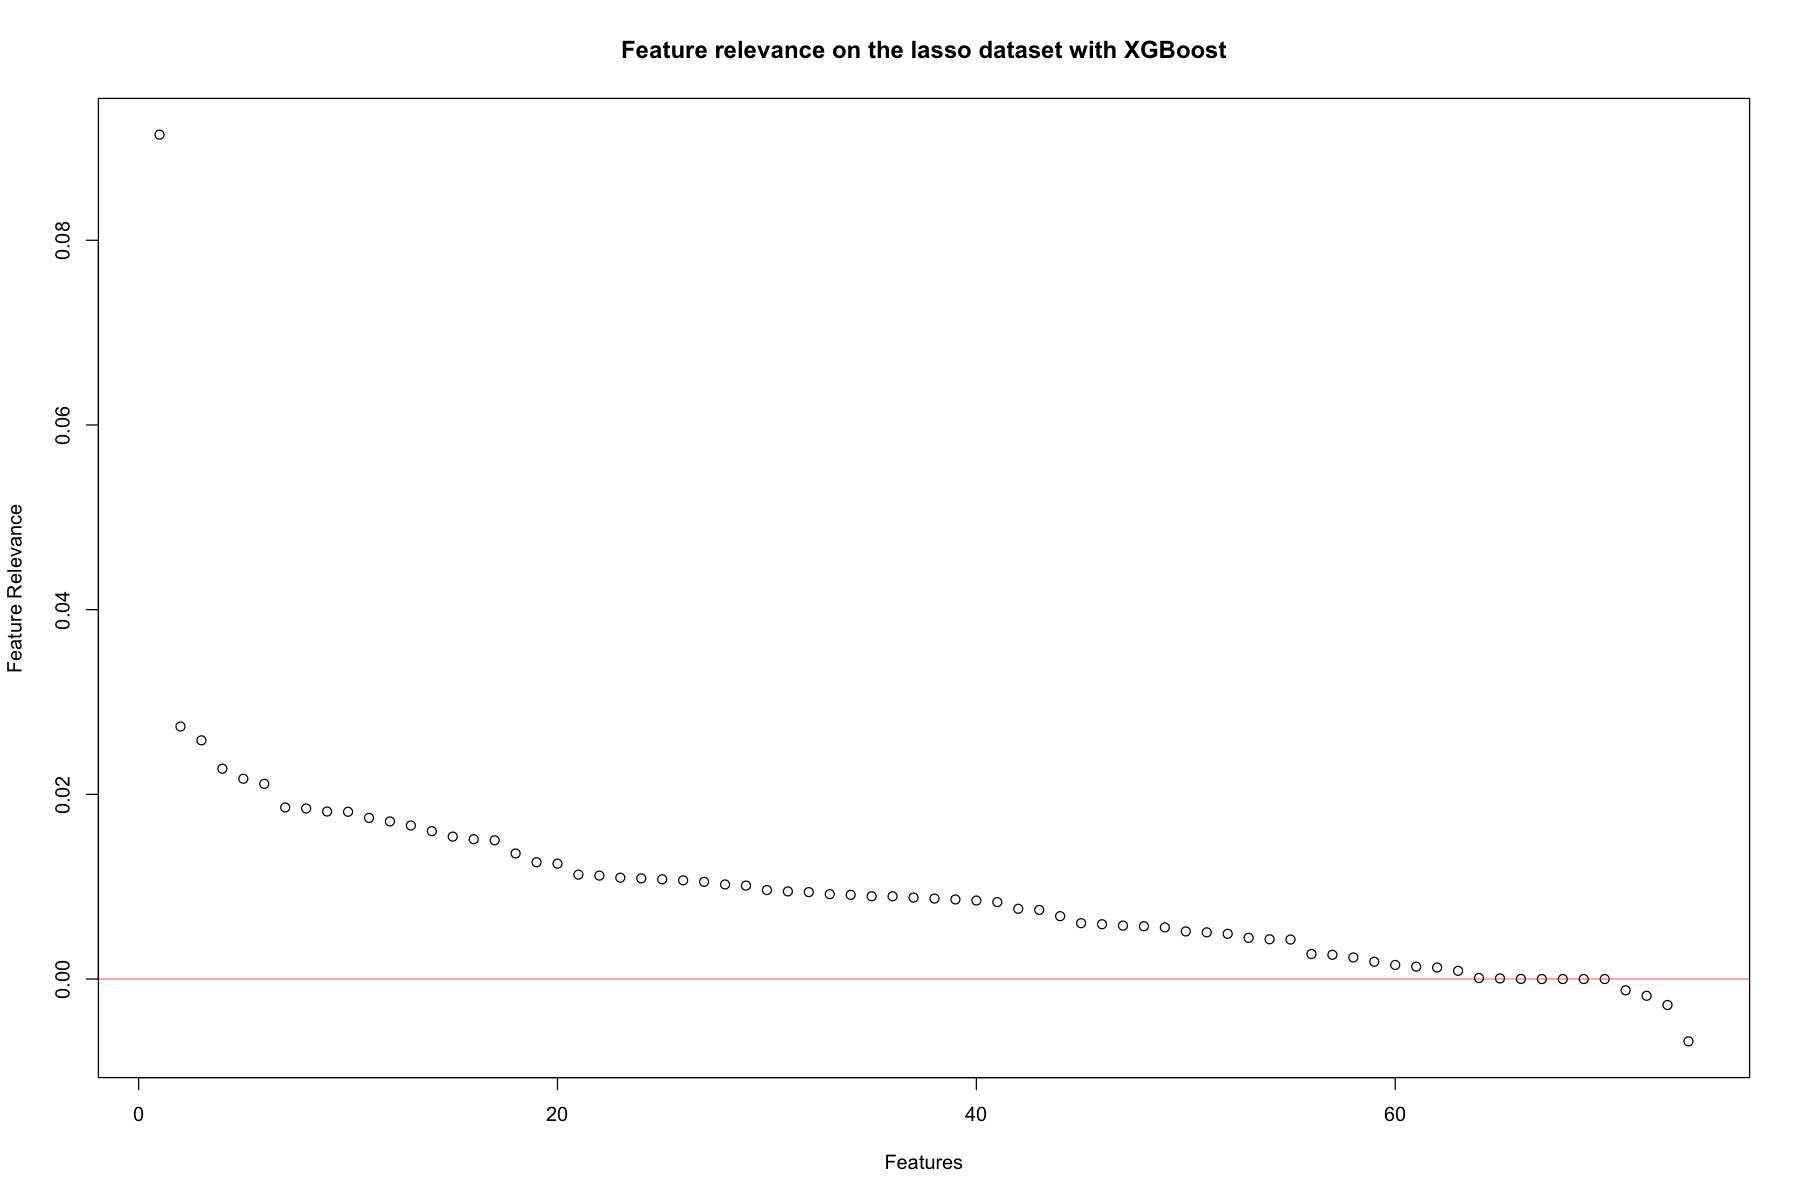

In [102]:
relevances_ordered <- readRDS("results/features_relevances.rds")
plot(relevances_ordered$relevance, xlab = "Features", ylab = "Feature Relevance", main  = "Feature relevance on the lasso dataset with XGBoost")
abline(h=0, col = "#ff000089")

The top 10 most relevant features are available in the next cell.

In [103]:
relevances_ordered[1:10,]

feature                             relevance         
1  geo_level_1_id                      0.0914353784437372
2  geo_level_2_id                      0.0273453236449527
43 has_superstructure_mud_mortar_brick 0.0258489781234014
50 legal_ownership_status.a            0.0227783250104643
52 legal_ownership_status.v            0.0216877863673302
58 has_secondary_use_institution       0.0211413120076752
20 ground_floor_type.x                 0.0185809741814921
59 has_secondary_use_school            0.0184693120954157
29 position.t                          0.0181426171506626
3  geo_level_3_id                      0.0181160841642589

The following are columns are the least relevant.

In [104]:
l <- nrow(relevances_ordered)
relevances_ordered[(l - 9):l, ]

feature                       relevance           
16 roof_type.x                   6.78075780746745e-05
37 plan_configuration.s          1.14887819181453e-05
32 plan_configuration.f          0                   
61 has_secondary_use_health_post 0                   
62 has_secondary_use_gov_office  0                   
63 has_secondary_use_use_police  0                   
33 plan_configuration.m          -0.00121957200463441
7  land_surface_condition.n      -0.00181274465078307
18 ground_floor_type.m           -0.00281104505373941
35 plan_configuration.o          -0.00674427010755163

## Conclusion

To conclude this project, several techniques and models have been tried. It seems that tree based models are well suited for this situation. Regression and neural network models are not well suited for this task. When it comes to preprocessing, adding new features seems to help the model as they appear quite high in the relevance score.

As next steps, it could be worth:
- Investigating techniques to deal with the imbalanced nature of the dataset
- Try to create new artificial features
- Fine grained the hyper parameter search